<div class="alert alert-block alert-success">
<a id='business'>
<font color = '#006400'> 
    
# Group C3 Project - Analysis of house prices in Lisbon</font>
</a>
    
</div>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

<div class="alert alert-block alert-warning">

<a id='basic'></a>

# Data
    
</div>

- Webscraping from https://www.idealista.pt/, https://www.imovirtual.com/ and https://supercasa.pt/ for Lisbon municipality
- In Idealista, the scraping was done by category, to avoid the limit of 60 pages and increase the number of observations

<div class="alert alert-block alert-warning">

<a id='stats'></a>

## Idealista
    
</div>

In [2]:
t0 = pd.read_csv("houses_T0.csv")
t0

,HouseID,Title,Hood,Parish,Price,Gross_Area,Typology
0,32621128,Estúdio T0 à venda em Bica - Santa Catarina,Misericórdia,NaN,395000,61,T0
1,32621128,Estúdio T0 à venda em Bica - Santa Catarina,Misericórdia,NaN,395000,61,T0
2,32598993,"Estúdio T0 à venda na avenida 24 de Julho, 178",Alcântara,Estrela,265000,36,T0
3,32598992,"Estúdio T0 à venda na avenida 24 de Julho, 178",Alcântara,Estrela,260000,40,T0
4,31580565,Estúdio T0 à venda em Principe Real - Praça da...,Santo António,NaN,425000,36,T0
...,...,...,...,...,...,...,...
430,32473086,Estúdio T0 à venda em Largo do Calvário - Lx F...,Alcântara,NaN,192500,30,T0
431,31230445,Estúdio T0 à venda em Santos-o-Velho - Madragoa,Estrela,NaN,180000,40,T0
432,32396286,Estúdio T0 à venda em Alfama - Sé,Santa Maria Maior,NaN,210000,35,T0
433,32207667,"Estúdio T0 à venda , Calçada de Santo André, 74",Castelo - Mouraria,Santa Maria Maior,149000,38,T0


In [3]:
t0['Typology'].value_counts()

T0    435
Name: Typology, dtype: int64

In [4]:
t0.isna().sum()

HouseID         0
Title           0
Hood            0
Parish        219
Price           0
Gross_Area      0
Typology        0
dtype: int64

__Some blank values in the Parish column, we handled them later in the final dataframe__

In [5]:
t0_clean = t0.copy()

In [6]:
t1 = pd.read_csv("houses_T1.csv")
t1

,HouseID,Title,Hood,Parish,Price,Gross_Area,Typology
0,32423566,Apartamento T1 à venda em Baixa,Santa Maria Maior,NaN,550000,78.0,T1
1,32423566,Apartamento T1 à venda em Baixa,Santa Maria Maior,NaN,550000,78.0,T1
2,32491593,Apartamento T1 à venda em Cais do Sodré - Santos,Misericórdia,NaN,500000,75.0,T1
3,32549807,Apartamento T1 à venda em Av. da Liberdade - M...,Santo António,NaN,750000,71.0,T1
4,32527470,"Apartamento T1 à venda , Calçada de São Vicente",Alfama - Sé,Santa Maria Maior,265000,54.0,T1
...,...,...,...,...,...,...,...
2143,31134083,"Apartamento T1 à venda na rua Carlos da Maia, 16",Centro,Campo de Ourique,385000,80.0,T1
2144,32424738,"Apartamento T1 à venda na rua do Terreirinho, ...",Castelo - Mouraria,Santa Maria Maior,225000,45.0,T1
2145,32069656,"Apartamento T1 à venda , Pátio Batista, 1",Calçada da Ajuda - Belém,Ajuda,199000,40.0,T1
2146,31853444,"Apartamento T1 à venda na rua Barracas, 55",Anjos,Arroios,145000,27.0,T1


In [7]:
t1.isna().sum()

HouseID          0
Title            0
Hood             0
Parish        1213
Price            0
Gross_Area      32
Typology         0
dtype: int64

In [8]:
t1['Typology'].value_counts()

T1                                 2116
1 andar                               5
2 andares                             3
45 m² área bruta                      2
89 m² área bruta, 33 m² úteis         2
70 m² área bruta, 65 m² úteis         2
697 m² área bruta, 558 m² úteis       2
32 m² área bruta, 30 m² úteis         2
84 m² área bruta                      1
23 m² área bruta                      1
74 m² área bruta                      1
252 m² área bruta                     1
Rés do chão                           1
73 m² área bruta                      1
35 m² área bruta, 32 m² úteis         1
367 m² área bruta, 270 m² úteis       1
62 m² área bruta, 60 m² úteis         1
62 m² área bruta                      1
51 m² área bruta                      1
28 m² área bruta, 25 m² úteis         1
31 m² área bruta, 29 m² úteis         1
3 andares                             1
Name: Typology, dtype: int64

__In some cases the Gross area is in the typology column. The "Rés do chão" and "X andares" values will be dropped__

In [9]:
t1_clean = t1.copy()

In [10]:
t1_area_fix = t1_clean[t1_clean['Typology'] != 'T1']

t1_area_fix["Gross_Area"] = t1_area_fix["Typology"].str.split().str[0]
t1_area_fix

C:\Users\joao_\AppData\Local\Temp\ipykernel_19628\247742084.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t1_area_fix["Gross_Area"] = t1_area_fix["Typology"].str.split().str[0]


,HouseID,Title,Hood,Parish,Price,Gross_Area,Typology
30,32626686,Casa ou moradia à venda na avenida Almirante ...,São João de Brito,Alvalade,2500000,367,"367 m² área bruta, 270 m² úteis"
46,32248606,Moradia em banda à venda em Alto do Lumiar - ...,Lumiar,NaN,425000,1,1 andar
267,31632406,Casa ou moradia à venda em Bairro Alto,Misericórdia,NaN,350000,45,45 m² área bruta
268,32581732,Moradia geminada à venda na travessa Parreira...,Campo de Santana - Santa Marta,Santo António,315000,31,"31 m² área bruta, 29 m² úteis"
270,31632406,Casa ou moradia à venda em Bairro Alto,Misericórdia,NaN,350000,45,45 m² área bruta
518,32373666,Moradia em banda à venda na travessa dos Brun...,Lapa,Estrela,350000,1,1 andar
519,32198050,"Moradia geminada à venda na rua dos Prazeres, 49",Príncipe Real - São Bento,Misericórdia,145000,28,"28 m² área bruta, 25 m² úteis"
569,32637821,Moradia em banda à venda em Beato,Lisboa,NaN,130000,51,51 m² área bruta
627,32420619,Casa ou moradia à venda em Castelo - Mouraria,Santa Maria Maior,NaN,420000,2,2 andares
639,32543547,Moradia em banda à venda na rua de Santo Estevão,Alfama - Sé,Santa Maria Maior,410000,62,62 m² área bruta


In [11]:
t1_clean.update(t1_area_fix)
t1_clean

,HouseID,Title,Hood,Parish,Price,Gross_Area,Typology
0,32423566.0,Apartamento T1 à venda em Baixa,Santa Maria Maior,NaN,550000.0,78.0,T1
1,32423566.0,Apartamento T1 à venda em Baixa,Santa Maria Maior,NaN,550000.0,78.0,T1
2,32491593.0,Apartamento T1 à venda em Cais do Sodré - Santos,Misericórdia,NaN,500000.0,75.0,T1
3,32549807.0,Apartamento T1 à venda em Av. da Liberdade - M...,Santo António,NaN,750000.0,71.0,T1
4,32527470.0,"Apartamento T1 à venda , Calçada de São Vicente",Alfama - Sé,Santa Maria Maior,265000.0,54.0,T1
...,...,...,...,...,...,...,...
2143,31134083.0,"Apartamento T1 à venda na rua Carlos da Maia, 16",Centro,Campo de Ourique,385000.0,80.0,T1
2144,32424738.0,"Apartamento T1 à venda na rua do Terreirinho, ...",Castelo - Mouraria,Santa Maria Maior,225000.0,45.0,T1
2145,32069656.0,"Apartamento T1 à venda , Pátio Batista, 1",Calçada da Ajuda - Belém,Ajuda,199000.0,40.0,T1
2146,31853444.0,"Apartamento T1 à venda na rua Barracas, 55",Anjos,Arroios,145000.0,27.0,T1


__Drop the "rés" and "X andares" rows__

In [12]:
t1_todrop = t1_clean[(t1_clean['Gross_Area'].astype(str).str.contains('[A-Za-z]')) | (pd.to_numeric(t1_clean['Gross_Area'], errors='coerce') < 10)]
t1_todrop

,HouseID,Title,Hood,Parish,Price,Gross_Area,Typology
46,32248606.0,Moradia em banda à venda em Alto do Lumiar - ...,Lumiar,NaN,425000.0,1,1 andar
518,32373666.0,Moradia em banda à venda na travessa dos Brun...,Lapa,Estrela,350000.0,1,1 andar
627,32420619.0,Casa ou moradia à venda em Castelo - Mouraria,Santa Maria Maior,NaN,420000.0,2,2 andares
824,32631210.0,Moradia em banda à venda em Marvila,Lisboa,NaN,435000.0,2,2 andares
937,31125276.0,Moradia independente à venda na rua Luís Dero...,Centro,Campo de Ourique,380000.0,2,2 andares
1231,30730372.0,"Moradia independente à venda , Vila Gadanho, 1",Centro,Penha de França,260000.0,1,1 andar
1632,32376580.0,Andar de moradia à venda na rua Vale Formoso,Marvila,Lisboa,199500.0,Rés,Rés do chão
1865,32417831.0,Moradia em banda à venda em Beato,Lisboa,NaN,140000.0,1,1 andar
2126,32334165.0,"Moradia geminada à venda na rua Vila Santos, 27",Centro - Nova Campolide,Campolide,120000.0,1,1 andar
2147,31417670.0,Moradia independente à venda na travessa do M...,Bica - Santa Catarina,Misericórdia,230000.0,3,3 andares


In [13]:
t1_clean = pd.merge(t1_clean, t1_todrop, how='outer', indicator=True)
t1_clean = t1_clean[t1_clean['_merge'] == 'left_only'].drop(columns='_merge')

In [14]:
t1_clean["Typology"].value_counts()

T1                                 2116
32 m² área bruta, 30 m² úteis         2
45 m² área bruta                      2
89 m² área bruta, 33 m² úteis         2
697 m² área bruta, 558 m² úteis       2
70 m² área bruta, 65 m² úteis         2
74 m² área bruta                      1
252 m² área bruta                     1
84 m² área bruta                      1
35 m² área bruta, 32 m² úteis         1
73 m² área bruta                      1
367 m² área bruta, 270 m² úteis       1
62 m² área bruta, 60 m² úteis         1
62 m² área bruta                      1
51 m² área bruta                      1
28 m² área bruta, 25 m² úteis         1
31 m² área bruta, 29 m² úteis         1
23 m² área bruta                      1
Name: Typology, dtype: int64

__These values are already present in Gross_Area, so we can replace them by T1__

In [15]:
t1_clean["Typology"] = "T1"

In [16]:
t1_clean

,HouseID,Title,Hood,Parish,Price,Gross_Area,Typology
0,32423566.0,Apartamento T1 à venda em Baixa,Santa Maria Maior,NaN,550000.0,78.0,T1
1,32423566.0,Apartamento T1 à venda em Baixa,Santa Maria Maior,NaN,550000.0,78.0,T1
2,32491593.0,Apartamento T1 à venda em Cais do Sodré - Santos,Misericórdia,NaN,500000.0,75.0,T1
3,32549807.0,Apartamento T1 à venda em Av. da Liberdade - M...,Santo António,NaN,750000.0,71.0,T1
4,32527470.0,"Apartamento T1 à venda , Calçada de São Vicente",Alfama - Sé,Santa Maria Maior,265000.0,54.0,T1
...,...,...,...,...,...,...,...
2142,31326398.0,"Apartamento T1 à venda na rua do Paraíso, 33",São Vicente de Fora,São Vicente,195000.0,43.0,T1
2143,31134083.0,"Apartamento T1 à venda na rua Carlos da Maia, 16",Centro,Campo de Ourique,385000.0,80.0,T1
2144,32424738.0,"Apartamento T1 à venda na rua do Terreirinho, ...",Castelo - Mouraria,Santa Maria Maior,225000.0,45.0,T1
2145,32069656.0,"Apartamento T1 à venda , Pátio Batista, 1",Calçada da Ajuda - Belém,Ajuda,199000.0,40.0,T1


__Now, the same logic was applied to all the other dataframes__

In [17]:
t2 = pd.read_csv("houses_T2.csv")
t2

,HouseID,Title,Hood,Parish,Price,Gross_Area,Typology
0,31548895,Apartamento T2 à venda na rua Sarmento de Beir...,Casal Vistoso,Areeiro,790000,120.0,T2
1,31548895,Apartamento T2 à venda na rua Sarmento de Beir...,Casal Vistoso,Areeiro,790000,120.0,T2
2,32429742,Apartamento T2 à venda em Olivais,Lisboa,NaN,229000,56.0,T2
3,32435504,Apartamento T2 à venda em Santa Isabel,Campo de Ourique,NaN,439000,70.0,T2
4,32408300,Apartamento T2 à venda em Centro,Campo de Ourique,NaN,499000,67.0,T2
...,...,...,...,...,...,...,...
1795,32556851,Apartamento T2 à venda em Anjos,Arroios,NaN,730000,115.0,T2
1796,32272178,Apartamento T2 à venda em Arneiros,Benfica,NaN,329900,69.0,T2
1797,32213933,"Apartamento T2 à venda , Calçada Poço dos Mour...",Centro,Penha de França,299500,84.0,T2
1798,32452382,Apartamento T2 à venda na rua Angelina Vidal,Centro,Penha de França,260000,51.0,T2


In [18]:
t2['Typology'].value_counts()

T2                                 1770
2 andares                            10
1 andar                               4
80 m² área bruta, 70 m² úteis         2
3 andares                             2
100 m² área bruta, 65 m² úteis        1
93 m² área bruta, 80 m² úteis         1
85 m² área bruta, 73 m² úteis         1
83 m² área bruta                      1
122 m² área bruta, 102 m² úteis       1
50 m² área bruta                      1
87 m² área bruta, 54 m² úteis         1
80 m² área bruta                      1
84 m² área bruta, 83 m² úteis         1
65 m² área bruta, 64 m² úteis         1
110 m² área bruta                     1
548 m² área bruta, 387 m² úteis       1
Name: Typology, dtype: int64

In [19]:
t2_clean = t2.copy()

In [20]:
t2_area_fix = t2_clean[t2_clean['Typology'] != 'T2']

t2_area_fix["Gross_Area"] = t2_area_fix["Typology"].str.split().str[0]
t2_area_fix

C:\Users\joao_\AppData\Local\Temp\ipykernel_19628\1931854380.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2_area_fix["Gross_Area"] = t2_area_fix["Typology"].str.split().str[0]


,HouseID,Title,Hood,Parish,Price,Gross_Area,Typology
148,32464045,Moradia geminada à venda na rua Capitão Afons...,Alcântara,Estrela,530000,83,83 m² área bruta
178,32270609,Moradia geminada à venda em Praça de Espanha ...,Campolide,NaN,199999,50,50 m² área bruta
247,32561290,Moradia independente à venda em Centro,Belém,NaN,980000,93,"93 m² área bruta, 80 m² úteis"
277,32277961,Moradia independente à venda em Bairro da Ser...,Campolide,NaN,199990,100,"100 m² área bruta, 65 m² úteis"
292,32573446,Casa ou moradia à venda em Centro,Belém,NaN,980000,2,2 andares
320,32534999,Moradia geminada à venda na rua Manuelzinho D...,Caselas,Belém,420000,2,2 andares
321,32361831,Moradia geminada à venda na rua 15,Centro,Belém,675000,1,1 andar
522,32595880,Moradia em banda à venda na rua do Cruzeiro,Alto de Alcântara,Alcântara,399950,2,2 andares
588,32288282,Moradia independente à venda em Príncipe Real...,Misericórdia,NaN,1100000,2,2 andares
606,32288282,Moradia independente à venda em Príncipe Real...,Misericórdia,NaN,1100000,2,2 andares


In [21]:
t2_clean.update(t2_area_fix)
t2_clean

,HouseID,Title,Hood,Parish,Price,Gross_Area,Typology
0,31548895.0,Apartamento T2 à venda na rua Sarmento de Beir...,Casal Vistoso,Areeiro,790000.0,120.0,T2
1,31548895.0,Apartamento T2 à venda na rua Sarmento de Beir...,Casal Vistoso,Areeiro,790000.0,120.0,T2
2,32429742.0,Apartamento T2 à venda em Olivais,Lisboa,NaN,229000.0,56.0,T2
3,32435504.0,Apartamento T2 à venda em Santa Isabel,Campo de Ourique,NaN,439000.0,70.0,T2
4,32408300.0,Apartamento T2 à venda em Centro,Campo de Ourique,NaN,499000.0,67.0,T2
...,...,...,...,...,...,...,...
1795,32556851.0,Apartamento T2 à venda em Anjos,Arroios,NaN,730000.0,115.0,T2
1796,32272178.0,Apartamento T2 à venda em Arneiros,Benfica,NaN,329900.0,69.0,T2
1797,32213933.0,"Apartamento T2 à venda , Calçada Poço dos Mour...",Centro,Penha de França,299500.0,84.0,T2
1798,32452382.0,Apartamento T2 à venda na rua Angelina Vidal,Centro,Penha de França,260000.0,51.0,T2


__Drop the "rés" and "X andares" rows__

In [22]:
t2_todrop = t2_clean[(t2_clean['Gross_Area'].astype(str).str.contains('[A-Za-z]')) | (pd.to_numeric(t2_clean['Gross_Area'], errors='coerce') < 10)]
t2_todrop

,HouseID,Title,Hood,Parish,Price,Gross_Area,Typology
292,32573446.0,Casa ou moradia à venda em Centro,Belém,NaN,980000.0,2,2 andares
320,32534999.0,Moradia geminada à venda na rua Manuelzinho D...,Caselas,Belém,420000.0,2,2 andares
321,32361831.0,Moradia geminada à venda na rua 15,Centro,Belém,675000.0,1,1 andar
522,32595880.0,Moradia em banda à venda na rua do Cruzeiro,Alto de Alcântara,Alcântara,399950.0,2,2 andares
588,32288282.0,Moradia independente à venda em Príncipe Real...,Misericórdia,NaN,1100000.0,2,2 andares
606,32288282.0,Moradia independente à venda em Príncipe Real...,Misericórdia,NaN,1100000.0,2,2 andares
756,32620272.0,"Moradia geminada à venda , Azinhaga da Salgada",Marvila,Lisboa,130000.0,1,1 andar
991,32456777.0,Moradia em banda à venda em Bairro Calçada do...,Campolide,NaN,218500.0,1,1 andar
998,32471364.0,Moradia independente à venda na rua Escola do...,Anjos,Arroios,439000.0,1,1 andar
1023,32505515.0,Moradia geminada à venda em Santa Isabel,Campo de Ourique,NaN,250000.0,2,2 andares


In [23]:
t2_clean = pd.merge(t2_clean, t2_todrop, how='outer', indicator=True)
t2_clean = t2_clean[t2_clean['_merge'] == 'left_only'].drop(columns='_merge')

In [24]:
t2_clean["Typology"].value_counts()

T2                                 1770
80 m² área bruta, 70 m² úteis         2
83 m² área bruta                      1
50 m² área bruta                      1
93 m² área bruta, 80 m² úteis         1
100 m² área bruta, 65 m² úteis        1
85 m² área bruta, 73 m² úteis         1
122 m² área bruta, 102 m² úteis       1
87 m² área bruta, 54 m² úteis         1
80 m² área bruta                      1
84 m² área bruta, 83 m² úteis         1
65 m² área bruta, 64 m² úteis         1
110 m² área bruta                     1
548 m² área bruta, 387 m² úteis       1
Name: Typology, dtype: int64

In [25]:
t2_clean["Typology"] = "T2"

In [26]:
t2_clean.isna().sum()

HouseID         0
Title           0
Hood            0
Parish        894
Price           0
Gross_Area      0
Typology        0
dtype: int64

In [27]:
t2_clean

,HouseID,Title,Hood,Parish,Price,Gross_Area,Typology
0,31548895.0,Apartamento T2 à venda na rua Sarmento de Beir...,Casal Vistoso,Areeiro,790000.0,120.0,T2
1,31548895.0,Apartamento T2 à venda na rua Sarmento de Beir...,Casal Vistoso,Areeiro,790000.0,120.0,T2
2,32429742.0,Apartamento T2 à venda em Olivais,Lisboa,NaN,229000.0,56.0,T2
3,32435504.0,Apartamento T2 à venda em Santa Isabel,Campo de Ourique,NaN,439000.0,70.0,T2
4,32408300.0,Apartamento T2 à venda em Centro,Campo de Ourique,NaN,499000.0,67.0,T2
...,...,...,...,...,...,...,...
1797,32556851.0,Apartamento T2 à venda em Anjos,Arroios,NaN,730000.0,115.0,T2
1798,32272178.0,Apartamento T2 à venda em Arneiros,Benfica,NaN,329900.0,69.0,T2
1799,32213933.0,"Apartamento T2 à venda , Calçada Poço dos Mour...",Centro,Penha de França,299500.0,84.0,T2
1800,32452382.0,Apartamento T2 à venda na rua Angelina Vidal,Centro,Penha de França,260000.0,51.0,T2


In [28]:
t3 = pd.read_csv("houses_T3.csv")
t3

,HouseID,Title,Hood,Parish,Price,Gross_Area,Typology
0,31989891,Apartamento T3 à venda na rua Rodrigo da Fonseca,Rato - Amoreiras,Santo António,1990000,176.0,T3
1,31989891,Apartamento T3 à venda na rua Rodrigo da Fonseca,Rato - Amoreiras,Santo António,1990000,176.0,T3
2,32509346,Apartamento T3 à venda em Rato - Amoreiras,Santo António,NaN,1950000,217.0,T3
3,32459378,Apartamento T3 à venda na rua Estácio da Veiga,Centro,Penha de França,450000,84.0,T3
4,32149425,Apartamento T3 à venda em São Sebastião da Ped...,Avenidas Novas,NaN,870000,144.0,T3
...,...,...,...,...,...,...,...
1795,32212929,Apartamento T3 à venda em Junqueira,Alcântara,NaN,2500000,246.0,T3
1796,31255719,Apartamento T3 à venda em Campo Pequeno - Praç...,Avenidas Novas,NaN,922000,157.0,T3
1797,31040239,Apartamento T3 à venda em Campo Grande,Alvalade,NaN,985000,137.0,T3
1798,31255859,Apartamento T3 à venda em Campo Pequeno - Praç...,Avenidas Novas,NaN,1005000,187.0,T3


In [29]:
t3['Typology'].value_counts()

T3                                 1729
3 andares                            14
2 andares                            11
202 m² área bruta                     5
1 andar                               4
4 andares                             3
101 m² área bruta                     2
135 m² área bruta                     2
Rés do chão                           2
197 m² área bruta, 105 m² úteis       2
153 m² área bruta, 134 m² úteis       1
201 m² área bruta, 131 m² úteis       1
101 m² área bruta, 56 m² úteis        1
320 m² área bruta, 195 m² úteis       1
130 m² área bruta, 94 m² úteis        1
411 m² área bruta, 176 m² úteis       1
255 m² área bruta                     1
226 m² área bruta, 212 m² úteis       1
146 m² área bruta, 128 m² úteis       1
182 m² área bruta                     1
126 m² área bruta                     1
297 m² área bruta, 172 m² úteis       1
405 m² área bruta, 174 m² úteis       1
201 m² área bruta, 166 m² úteis       1
101 m² área bruta, 74 m² úteis        1


In [30]:
t3_clean = t3.copy()

In [31]:
t3_area_fix = t3_clean[t3_clean['Typology'] != 'T3']

t3_area_fix["Gross_Area"] = t3_area_fix["Typology"].str.split().str[0]
t3_area_fix

C:\Users\joao_\AppData\Local\Temp\ipykernel_19628\89552436.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t3_area_fix["Gross_Area"] = t3_area_fix["Typology"].str.split().str[0]


,HouseID,Title,Hood,Parish,Price,Gross_Area,Typology
15,32494760,Moradia independente à venda em Cais do Sodré...,Misericórdia,NaN,1590000,202,202 m² área bruta
41,32601459,Casa ou moradia à venda em Centro,Belém,NaN,1400000,3,3 andares
110,32026323,Moradia independente à venda em Alcântara,Estrela,NaN,4550000,3,3 andares
127,32558974,Moradia independente à venda em Príncipe Real...,Misericórdia,NaN,4950000,3,3 andares
162,32636377,Moradia geminada à venda na rua Eduardo Noron...,São João de Brito,Alvalade,1350000,171,"171 m² área bruta, 150 m² úteis"
...,...,...,...,...,...,...,...
1599,32397202,Moradia independente à venda na rua do Casal ...,Caselas,Belém,499000,197,"197 m² área bruta, 105 m² úteis"
1623,32466524,Moradia independente à venda em Lapa,Estrela,NaN,3750000,350,"350 m² área bruta, 300 m² úteis"
1730,32246917,Moradia em banda à venda em Alto do Lumiar - ...,Lumiar,NaN,1140000,1,1 andar
1765,32246807,Moradia em banda à venda em Alto do Lumiar - ...,Lumiar,NaN,1320000,1,1 andar


In [32]:
t3_clean.update(t3_area_fix)
t3_clean

,HouseID,Title,Hood,Parish,Price,Gross_Area,Typology
0,31989891.0,Apartamento T3 à venda na rua Rodrigo da Fonseca,Rato - Amoreiras,Santo António,1990000.0,176.0,T3
1,31989891.0,Apartamento T3 à venda na rua Rodrigo da Fonseca,Rato - Amoreiras,Santo António,1990000.0,176.0,T3
2,32509346.0,Apartamento T3 à venda em Rato - Amoreiras,Santo António,NaN,1950000.0,217.0,T3
3,32459378.0,Apartamento T3 à venda na rua Estácio da Veiga,Centro,Penha de França,450000.0,84.0,T3
4,32149425.0,Apartamento T3 à venda em São Sebastião da Ped...,Avenidas Novas,NaN,870000.0,144.0,T3
...,...,...,...,...,...,...,...
1795,32212929.0,Apartamento T3 à venda em Junqueira,Alcântara,NaN,2500000.0,246.0,T3
1796,31255719.0,Apartamento T3 à venda em Campo Pequeno - Praç...,Avenidas Novas,NaN,922000.0,157.0,T3
1797,31040239.0,Apartamento T3 à venda em Campo Grande,Alvalade,NaN,985000.0,137.0,T3
1798,31255859.0,Apartamento T3 à venda em Campo Pequeno - Praç...,Avenidas Novas,NaN,1005000.0,187.0,T3


__Drop the "rés" and "X andares" rows__

In [33]:
t3_todrop = t3_clean[(t3_clean['Gross_Area'].astype(str).str.contains('[A-Za-z]')) | (pd.to_numeric(t3_clean['Gross_Area'], errors='coerce') < 10)]
t3_todrop

,HouseID,Title,Hood,Parish,Price,Gross_Area,Typology
41,32601459.0,Casa ou moradia à venda em Centro,Belém,NaN,1400000.0,3,3 andares
110,32026323.0,Moradia independente à venda em Alcântara,Estrela,NaN,4550000.0,3,3 andares
127,32558974.0,Moradia independente à venda em Príncipe Real...,Misericórdia,NaN,4950000.0,3,3 andares
220,32551293.0,"Moradia geminada à venda , Calçada do Mirante...",Palácio da Ajuda,Ajuda,775000.0,2,2 andares
225,32555284.0,Moradia geminada à venda na rua do Parque,Bairro de Santa Cruz,Benfica,1680000.0,3,3 andares
243,32609749.0,"Moradia independente à venda na rua Giestal, 8",Junqueira,Alcântara,350000.0,3,3 andares
306,32624160.0,Moradia geminada à venda na rua Alfredo Pimen...,Bairro de Santa Cruz,Benfica,990000.0,2,2 andares
327,32449453.0,"Moradia geminada à venda na rua do Cruzeiro, 123",Rio Seco - Casalinho,Ajuda,1200000.0,3,3 andares
426,31011364.0,Casa ou moradia à venda em Alcântara,Estrela,NaN,450000.0,3,3 andares
474,32630021.0,Moradia independente à venda na rua Carvalho ...,Bairro dos Actores - Barão Sabrosa,Penha de França,1150000.0,4,4 andares


In [34]:
t3_clean = pd.merge(t3_clean, t3_todrop, how='outer', indicator=True)
t3_clean = t3_clean[t3_clean['_merge'] == 'left_only'].drop(columns='_merge')

In [35]:
t3_clean["Typology"].value_counts()

T3                                 1729
202 m² área bruta                     5
197 m² área bruta, 105 m² úteis       2
101 m² área bruta                     2
135 m² área bruta                     2
411 m² área bruta, 176 m² úteis       1
153 m² área bruta, 134 m² úteis       1
201 m² área bruta, 131 m² úteis       1
101 m² área bruta, 56 m² úteis        1
320 m² área bruta, 195 m² úteis       1
130 m² área bruta, 94 m² úteis        1
255 m² área bruta                     1
226 m² área bruta, 212 m² úteis       1
146 m² área bruta, 128 m² úteis       1
182 m² área bruta                     1
126 m² área bruta                     1
201 m² área bruta, 166 m² úteis       1
405 m² área bruta, 174 m² úteis       1
297 m² área bruta, 172 m² úteis       1
101 m² área bruta, 74 m² úteis        1
230 m² área bruta, 150 m² úteis       1
84 m² área bruta, 80 m² úteis         1
255 m² área bruta, 198 m² úteis       1
134 m² área bruta                     1
390 m² área bruta, 278 m² úteis       1


In [36]:
t3_clean["Typology"] = "T3"

In [37]:
t3_clean.isna().sum()

HouseID         0
Title           0
Hood            0
Parish        874
Price           0
Gross_Area      0
Typology        0
dtype: int64

In [38]:
t3_clean

,HouseID,Title,Hood,Parish,Price,Gross_Area,Typology
0,31989891.0,Apartamento T3 à venda na rua Rodrigo da Fonseca,Rato - Amoreiras,Santo António,1990000.0,176.0,T3
1,31989891.0,Apartamento T3 à venda na rua Rodrigo da Fonseca,Rato - Amoreiras,Santo António,1990000.0,176.0,T3
2,32509346.0,Apartamento T3 à venda em Rato - Amoreiras,Santo António,NaN,1950000.0,217.0,T3
3,32459378.0,Apartamento T3 à venda na rua Estácio da Veiga,Centro,Penha de França,450000.0,84.0,T3
4,32149425.0,Apartamento T3 à venda em São Sebastião da Ped...,Avenidas Novas,NaN,870000.0,144.0,T3
...,...,...,...,...,...,...,...
1797,32468631.0,Apartamento T3 à venda em Campo Grande,Alvalade,NaN,1083000.0,183.0,T3
1798,32454944.0,Apartamento T3 à venda na rua Doutor Rafael Duque,Arneiros,Benfica,489900.0,95.0,T3
1799,32212929.0,Apartamento T3 à venda em Junqueira,Alcântara,NaN,2500000.0,246.0,T3
1800,31255719.0,Apartamento T3 à venda em Campo Pequeno - Praç...,Avenidas Novas,NaN,922000.0,157.0,T3


In [39]:
t4 = pd.read_csv("houses_T4.csv")
t4

,HouseID,Title,Hood,Parish,Price,Gross_Area,Typology
0,32457287,Apartamento T4 à venda na rua Damião de Góis,Pedrouços,Belém,1280000,228.0,T4
1,32457287,Apartamento T4 à venda na rua Damião de Góis,Pedrouços,Belém,1280000,228.0,T4
2,31989779,Duplex à venda na rua Rodrigo da Fonseca,Rato - Amoreiras,Santo António,2650000,220.0,T4
3,32396616,Apartamento T4 à venda em Campo Pequeno - Praç...,Avenidas Novas,NaN,1850000,282.0,T4
4,32464101,Apartamento T5 à venda em Lapa,Estrela,NaN,1950000,306.0,T5
...,...,...,...,...,...,...,...
2108,31730422,"Penthouse à venda , Calçada de Carriche, 80",Carriche - Hospital das Forças Armadas,Lumiar,656000,160.0,T4
2109,30744251,"Duplex à venda na avenida 24 de Julho, 66 No",Santos-o-Velho - Madragoa,Estrela,626000,192.0,T8
2110,32065909,"Apartamento T4 à venda na rua Manuel Marques, ...",Alto do Lumiar - Quinta das Conchas - Quinta d...,Lumiar,700000,150.0,T4
2111,31706061,"Apartamento T4 à venda na alameda Roentgen, 7 ...",Carnide,Lisboa,720000,180.0,T4


In [40]:
t4['Typology'].value_counts()

T4                                     1218
T5                                      360
T6                                      131
3 andares                                64
2 andares                                45
                                       ... 
1.931 m² área bruta, 1.525 m² úteis       1
168 m² área bruta                         1
147 m² área bruta, 120 m² úteis           1
170 m² área bruta, 141 m² úteis           1
680 m² área bruta                         1
Name: Typology, Length: 148, dtype: int64

In [41]:
t4_clean = t4.copy()

### Replacing the typology of all T4 houses and above to "T4+"

In [42]:
t4_clean[t4_clean['Typology'].str.startswith('T')]["Typology"].value_counts()

T4            1218
T5             360
T6             131
T7              38
T8              17
T9 ou mais      10
T10              7
T11              2
T12              2
T20              1
T45              1
T13              1
Name: Typology, dtype: int64

In [43]:
values = t4_clean[t4_clean['Typology'].str.startswith('T')]["Typology"].value_counts().index.tolist()
values

['T4',
 'T5',
 'T6',
 'T7',
 'T8',
 'T9 ou mais',
 'T10',
 'T11',
 'T12',
 'T20',
 'T45',
 'T13']

In [44]:
t4_clean.loc[t4_clean['Typology'].isin(values), "Typology"] = "T4+"

t4_clean

,HouseID,Title,Hood,Parish,Price,Gross_Area,Typology
0,32457287,Apartamento T4 à venda na rua Damião de Góis,Pedrouços,Belém,1280000,228.0,T4+
1,32457287,Apartamento T4 à venda na rua Damião de Góis,Pedrouços,Belém,1280000,228.0,T4+
2,31989779,Duplex à venda na rua Rodrigo da Fonseca,Rato - Amoreiras,Santo António,2650000,220.0,T4+
3,32396616,Apartamento T4 à venda em Campo Pequeno - Praç...,Avenidas Novas,NaN,1850000,282.0,T4+
4,32464101,Apartamento T5 à venda em Lapa,Estrela,NaN,1950000,306.0,T4+
...,...,...,...,...,...,...,...
2108,31730422,"Penthouse à venda , Calçada de Carriche, 80",Carriche - Hospital das Forças Armadas,Lumiar,656000,160.0,T4+
2109,30744251,"Duplex à venda na avenida 24 de Julho, 66 No",Santos-o-Velho - Madragoa,Estrela,626000,192.0,T4+
2110,32065909,"Apartamento T4 à venda na rua Manuel Marques, ...",Alto do Lumiar - Quinta das Conchas - Quinta d...,Lumiar,700000,150.0,T4+
2111,31706061,"Apartamento T4 à venda na alameda Roentgen, 7 ...",Carnide,Lisboa,720000,180.0,T4+


In [45]:
t4_area_fix = t4_clean[t4_clean['Typology'] != 'T4+']

t4_area_fix["Gross_Area"] = t4_area_fix["Typology"].str.split().str[0]
t4_area_fix

C:\Users\joao_\AppData\Local\Temp\ipykernel_19628\1878276764.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t4_area_fix["Gross_Area"] = t4_area_fix["Typology"].str.split().str[0]


,HouseID,Title,Hood,Parish,Price,Gross_Area,Typology
20,31158719,Moradia independente à venda na rua Acácio de...,São João de Brito,Alvalade,5800000,870,"870 m² área bruta, 848 m² úteis"
22,32211281,Moradia geminada à venda na rua Dr. José Albe...,Bairro de Santa Cruz,Benfica,890000,2,2 andares
42,32251215,Moradia independente à venda em Olivais,Lisboa,NaN,1100000,340,"340 m² área bruta, 200 m² úteis"
56,32116241,Moradia geminada à venda em Caselas,Belém,NaN,590000,223,"223 m² área bruta, 190 m² úteis"
69,32556550,Moradia geminada à venda em Bairro de Santa Cruz,Benfica,NaN,880000,185,"185 m² área bruta, 158 m² úteis"
...,...,...,...,...,...,...,...
2077,32244084,Casa ou moradia à venda em Telheiras,Lumiar,NaN,2366000,2,2 andares
2078,32442231,Casa ou moradia à venda em Marvila,Lisboa,NaN,750000,2,2 andares
2091,31955430,Moradia independente à venda na rua de São Be...,Largo do Rato - Estrela,Campo de Ourique,990000,4,4 andares
2100,32205603,Moradia independente à venda em Restelo,Belém,NaN,6900000,3,3 andares


In [46]:
t4_clean.update(t4_area_fix)
t4_clean

,HouseID,Title,Hood,Parish,Price,Gross_Area,Typology
0,32457287.0,Apartamento T4 à venda na rua Damião de Góis,Pedrouços,Belém,1280000.0,228.0,T4+
1,32457287.0,Apartamento T4 à venda na rua Damião de Góis,Pedrouços,Belém,1280000.0,228.0,T4+
2,31989779.0,Duplex à venda na rua Rodrigo da Fonseca,Rato - Amoreiras,Santo António,2650000.0,220.0,T4+
3,32396616.0,Apartamento T4 à venda em Campo Pequeno - Praç...,Avenidas Novas,NaN,1850000.0,282.0,T4+
4,32464101.0,Apartamento T5 à venda em Lapa,Estrela,NaN,1950000.0,306.0,T4+
...,...,...,...,...,...,...,...
2108,31730422.0,"Penthouse à venda , Calçada de Carriche, 80",Carriche - Hospital das Forças Armadas,Lumiar,656000.0,160.0,T4+
2109,30744251.0,"Duplex à venda na avenida 24 de Julho, 66 No",Santos-o-Velho - Madragoa,Estrela,626000.0,192.0,T4+
2110,32065909.0,"Apartamento T4 à venda na rua Manuel Marques, ...",Alto do Lumiar - Quinta das Conchas - Quinta d...,Lumiar,700000.0,150.0,T4+
2111,31706061.0,"Apartamento T4 à venda na alameda Roentgen, 7 ...",Carnide,Lisboa,720000.0,180.0,T4+


__Drop the "rés" and "X andares" rows__

In [47]:
t4_todrop = t4_clean[(t4_clean['Gross_Area'].astype(str).str.contains('[A-Za-z]')) | (pd.to_numeric(t4_clean['Gross_Area'], errors='coerce') < 10)]
t4_todrop

,HouseID,Title,Hood,Parish,Price,Gross_Area,Typology
22,32211281.0,Moradia geminada à venda na rua Dr. José Albe...,Bairro de Santa Cruz,Benfica,890000.0,2,2 andares
70,32569040.0,Moradia em banda à venda na rua Campo de Ouri...,Santa Isabel,Campo de Ourique,3550000.0,2,2 andares
73,32241432.0,Moradia independente à venda em Lapa,Estrela,NaN,3500000.0,4,4 andares
86,31914239.0,Moradia em banda à venda em Cais do Sodré - S...,Misericórdia,NaN,4700000.0,2,2 andares
95,32427458.0,Moradia em banda à venda em Alfama - Sé,Santa Maria Maior,NaN,3450000.0,4,4 andares
...,...,...,...,...,...,...,...
2074,32239230.0,Moradia independente à venda em Restelo,Belém,NaN,3450000.0,3,3 andares
2077,32244084.0,Casa ou moradia à venda em Telheiras,Lumiar,NaN,2366000.0,2,2 andares
2078,32442231.0,Casa ou moradia à venda em Marvila,Lisboa,NaN,750000.0,2,2 andares
2091,31955430.0,Moradia independente à venda na rua de São Be...,Largo do Rato - Estrela,Campo de Ourique,990000.0,4,4 andares


In [48]:
t4_clean = pd.merge(t4_clean, t4_todrop, how='outer', indicator=True)
t4_clean = t4_clean[t4_clean['_merge'] == 'left_only'].drop(columns='_merge')

In [49]:
t4_clean["Typology"].value_counts()

T4+                                1786
248 m² área bruta, 215 m² úteis       5
300 m² área bruta                     4
242 m² área bruta                     3
950 m² área bruta                     3
                                   ... 
37 m² área bruta                      1
168 m² área bruta                     1
147 m² área bruta, 120 m² úteis       1
170 m² área bruta, 141 m² úteis       1
680 m² área bruta                     1
Name: Typology, Length: 125, dtype: int64

In [50]:
t4_clean["Typology"] = "T4+"

In [51]:
t4_clean.isna().sum()

HouseID          0
Title            0
Hood             0
Parish        1062
Price            0
Gross_Area       0
Typology         0
dtype: int64

In [52]:
t4_clean

,HouseID,Title,Hood,Parish,Price,Gross_Area,Typology
0,32457287.0,Apartamento T4 à venda na rua Damião de Góis,Pedrouços,Belém,1280000.0,228.0,T4+
1,32457287.0,Apartamento T4 à venda na rua Damião de Góis,Pedrouços,Belém,1280000.0,228.0,T4+
2,31989779.0,Duplex à venda na rua Rodrigo da Fonseca,Rato - Amoreiras,Santo António,2650000.0,220.0,T4+
3,32396616.0,Apartamento T4 à venda em Campo Pequeno - Praç...,Avenidas Novas,NaN,1850000.0,282.0,T4+
4,32464101.0,Apartamento T5 à venda em Lapa,Estrela,NaN,1950000.0,306.0,T4+
...,...,...,...,...,...,...,...
2138,31730422.0,"Penthouse à venda , Calçada de Carriche, 80",Carriche - Hospital das Forças Armadas,Lumiar,656000.0,160.0,T4+
2139,30744251.0,"Duplex à venda na avenida 24 de Julho, 66 No",Santos-o-Velho - Madragoa,Estrela,626000.0,192.0,T4+
2140,32065909.0,"Apartamento T4 à venda na rua Manuel Marques, ...",Alto do Lumiar - Quinta das Conchas - Quinta d...,Lumiar,700000.0,150.0,T4+
2141,31706061.0,"Apartamento T4 à venda na alameda Roentgen, 7 ...",Carnide,Lisboa,720000.0,180.0,T4+


## Merging all idealista dataframes

In [53]:
idealista = pd.concat([t0_clean, t1_clean, t2_clean, t3_clean, t4_clean], axis = 0)
idealista

,HouseID,Title,Hood,Parish,Price,Gross_Area,Typology
0,32621128.0,Estúdio T0 à venda em Bica - Santa Catarina,Misericórdia,NaN,395000.0,61,T0
1,32621128.0,Estúdio T0 à venda em Bica - Santa Catarina,Misericórdia,NaN,395000.0,61,T0
2,32598993.0,"Estúdio T0 à venda na avenida 24 de Julho, 178",Alcântara,Estrela,265000.0,36,T0
3,32598992.0,"Estúdio T0 à venda na avenida 24 de Julho, 178",Alcântara,Estrela,260000.0,40,T0
4,31580565.0,Estúdio T0 à venda em Principe Real - Praça da...,Santo António,NaN,425000.0,36,T0
...,...,...,...,...,...,...,...
2138,31730422.0,"Penthouse à venda , Calçada de Carriche, 80",Carriche - Hospital das Forças Armadas,Lumiar,656000.0,160.0,T4+
2139,30744251.0,"Duplex à venda na avenida 24 de Julho, 66 No",Santos-o-Velho - Madragoa,Estrela,626000.0,192.0,T4+
2140,32065909.0,"Apartamento T4 à venda na rua Manuel Marques, ...",Alto do Lumiar - Quinta das Conchas - Quinta d...,Lumiar,700000.0,150.0,T4+
2141,31706061.0,"Apartamento T4 à venda na alameda Roentgen, 7 ...",Carnide,Lisboa,720000.0,180.0,T4+


In [54]:
idealista[idealista.duplicated()]

,HouseID,Title,Hood,Parish,Price,Gross_Area,Typology
1,32621128.0,Estúdio T0 à venda em Bica - Santa Catarina,Misericórdia,NaN,395000.0,61,T0
150,32286717.0,Estúdio T0 à venda em Castelo - Mouraria,Santa Maria Maior,NaN,300000.0,47,T0
180,32503129.0,Estúdio T0 à venda na rua do Vale de Santo Ant...,São Vicente de Fora,São Vicente,299900.0,63,T0
181,32503536.0,Estúdio T0 à venda na praceta Pátio Salema s/n,Pena,Arroios,525000.0,50,T0
210,32370536.0,Apartamento T0 à venda na rua do conde redondo...,Av. da Liberdade - Marquês de Pombal,Santo António,428000.0,75,T0
...,...,...,...,...,...,...,...
1946,32241576.0,Apartamento T4 à venda em Beato,Lisboa,NaN,1650000.0,257.0,T4+
1968,32228332.0,Duplex à venda na rua Vila Correia,Torre de Belém,Belém,1950000.0,297.0,T4+
1970,31249683.0,Apartamento T4 à venda em Baixa,Santa Maria Maior,NaN,1000000.0,136.0,T4+
2002,32587909.0,Apartamento T4 à venda na rua dos Baldaques,Bairro dos Actores - Barão Sabrosa,Penha de França,760000.0,125.0,T4+


In [55]:
idealista.drop_duplicates(inplace = True)
idealista

,HouseID,Title,Hood,Parish,Price,Gross_Area,Typology
0,32621128.0,Estúdio T0 à venda em Bica - Santa Catarina,Misericórdia,NaN,395000.0,61,T0
2,32598993.0,"Estúdio T0 à venda na avenida 24 de Julho, 178",Alcântara,Estrela,265000.0,36,T0
3,32598992.0,"Estúdio T0 à venda na avenida 24 de Julho, 178",Alcântara,Estrela,260000.0,40,T0
4,31580565.0,Estúdio T0 à venda em Principe Real - Praça da...,Santo António,NaN,425000.0,36,T0
5,32503498.0,Estúdio T0 à venda na praceta Pátio Salema s/n,Pena,Arroios,525000.0,54,T0
...,...,...,...,...,...,...,...
2138,31730422.0,"Penthouse à venda , Calçada de Carriche, 80",Carriche - Hospital das Forças Armadas,Lumiar,656000.0,160.0,T4+
2139,30744251.0,"Duplex à venda na avenida 24 de Julho, 66 No",Santos-o-Velho - Madragoa,Estrela,626000.0,192.0,T4+
2140,32065909.0,"Apartamento T4 à venda na rua Manuel Marques, ...",Alto do Lumiar - Quinta das Conchas - Quinta d...,Lumiar,700000.0,150.0,T4+
2141,31706061.0,"Apartamento T4 à venda na alameda Roentgen, 7 ...",Carnide,Lisboa,720000.0,180.0,T4+


In [56]:
idealista['Typology'].value_counts()

T1     1909
T4+    1753
T2     1628
T3     1591
T0      424
Name: Typology, dtype: int64

In [57]:
idealista.isna().sum()

HouseID          0
Title            0
Hood             0
Parish        3788
Price            0
Gross_Area       0
Typology         0
dtype: int64

In [58]:
idealista['Parish'].value_counts()

Arroios                    286
Avenidas Novas             260
Lisboa                     232
Santo António              218
Estrela                    211
Misericórdia               199
Benfica                    192
Santa Maria Maior          185
São Vicente                183
Penha de França            171
Belém                      166
Campo de Ourique           155
Lumiar                     152
São Jorge de Arroios       148
São Domingos de Benfica    147
Areeiro                    136
Alvalade                   130
Parque das Nações          109
Campolide                   97
Alcântara                   87
Ajuda                       53
Name: Parish, dtype: int64

# Handling the blank values in "Parish"

In [59]:
idealista[idealista["Parish"].isna()]

,HouseID,Title,Hood,Parish,Price,Gross_Area,Typology
0,32621128.0,Estúdio T0 à venda em Bica - Santa Catarina,Misericórdia,NaN,395000.0,61,T0
4,31580565.0,Estúdio T0 à venda em Principe Real - Praça da...,Santo António,NaN,425000.0,36,T0
7,32365756.0,Estúdio T0 à venda em Bica - Santa Catarina,Misericórdia,NaN,200000.0,40,T0
8,32620497.0,Estúdio T0 à venda em Santa Engrácia,São Vicente,NaN,299900.0,63,T0
9,32036079.0,Estúdio T0 à venda em Bica - Santa Catarina,Misericórdia,NaN,225000.0,35,T0
...,...,...,...,...,...,...,...
2123,32366193.0,Apartamento T4 à venda em Chiado,Santa Maria Maior,NaN,2700000.0,206.0,T4+
2124,31307380.0,Apartamento T8 à venda em Anjos,Arroios,NaN,899000.0,200.0,T4+
2125,31670280.0,Apartamento T4 à venda em Restelo,Belém,NaN,1800000.0,280.0,T4+
2127,31475491.0,Apartamento T4 à venda em Expo Sul,Parque das Nações,NaN,760000.0,120.0,T4+


In [60]:
idealista[idealista["Parish"].isna()]["Hood"].value_counts()

Avenidas Novas             335
Santo António              298
Lisboa                     279
Santa Maria Maior          257
Estrela                    249
Misericórdia               245
Alvalade                   228
Belém                      219
Benfica                    198
São Vicente                195
Campolide                  165
Parque das Nações          165
Arroios                    153
Penha de França            148
Campo de Ourique           147
Alcântara                  139
São Domingos de Benfica    116
Areeiro                    108
Lumiar                      98
Ajuda                       46
Name: Hood, dtype: int64

__The values in the Hood column are all parish values__ - We replaced the empty values with the values in hood

In [61]:
idealista.loc[idealista["Parish"].isna(), "Parish"] = idealista.loc[idealista["Parish"].isna(), "Hood"]

In [62]:
idealista.isna().sum()

HouseID       0
Title         0
Hood          0
Parish        0
Price         0
Gross_Area    0
Typology      0
dtype: int64

In [63]:
idealista['Parish'].value_counts()

Avenidas Novas             595
Santo António              516
Lisboa                     511
Estrela                    460
Misericórdia               444
Santa Maria Maior          442
Arroios                    439
Benfica                    390
Belém                      385
São Vicente                378
Alvalade                   358
Penha de França            319
Campo de Ourique           302
Parque das Nações          274
São Domingos de Benfica    263
Campolide                  262
Lumiar                     250
Areeiro                    244
Alcântara                  226
São Jorge de Arroios       148
Ajuda                       99
Name: Parish, dtype: int64

__Still some issues in the parishes:__ 

- São Jorge de Arroios belongs to Arroios
- We have "Lisboa" but there is no Lisboa parish

In [64]:
idealista.replace({"Parish":{"São Jorge de Arroios": "Arroios"}}, inplace = True)

In [65]:
idealista[idealista["Parish"] == "Lisboa"]["Hood"].value_counts()

Lisboa         279
Olivais         88
Santa Clara     42
Carnide         38
Beato           32
Marvila         32
Name: Hood, dtype: int64

In [66]:
idealista["Parish"] = np.where(idealista["Parish"] == 'Lisboa', idealista["Hood"], idealista["Parish"])

__For the remaining Lisboa values, we looked at the title of the announcement:__

In [67]:
idealista[idealista["Parish"] == "Lisboa"]["Title"].value_counts()

Apartamento T1 à venda em Santa Clara                  37
Apartamento T1 à venda em Beato                        25
Apartamento T3 à venda em Marvila                      15
Apartamento T1 à venda em Marvila                      15
Apartamento T3 à venda em Carnide                      15
Apartamento T2 à venda em Olivais                      14
Apartamento T3 à venda em Olivais                      14
Apartamento T4 à venda em Olivais                      13
Apartamento T3 à venda em Beato                        11
Apartamento T1 à venda em Olivais                      10
Apartamento T3 à venda em Santa Clara                  10
Apartamento T2 à venda em Beato                         8
Apartamento T2 à venda em Santa Clara                   7
Apartamento T4 à venda em Carnide                       6
Apartamento T5 à venda em Olivais                       6
Estúdio T0 à venda em Marvila                           6
Apartamento T2 à venda em Marvila                       6
Apartamento T1

__The parish seems to be consistently the last word, so we got the last word for each title and replaced "Clara" with "Santa Clara"__

In [68]:
idealista.loc[idealista["Parish"] == "Lisboa", "Parish"] = idealista[idealista["Parish"] == "Lisboa"]["Title"].str.split().str[-1]

In [69]:
idealista.replace({"Parish":{"Clara": "Santa Clara"}}, inplace = True)

In [70]:
idealista[idealista["Parish"] == "Lisboa"].value_counts()

Series([], dtype: int64)

In [71]:
idealista['Parish'].value_counts()

Avenidas Novas             595
Arroios                    587
Santo António              516
Estrela                    460
Misericórdia               444
Santa Maria Maior          442
Benfica                    390
Belém                      385
São Vicente                378
Alvalade                   358
Penha de França            319
Campo de Ourique           302
Parque das Nações          274
São Domingos de Benfica    263
Campolide                  262
Lumiar                     250
Areeiro                    244
Alcântara                  226
Olivais                    158
Santa Clara                110
Ajuda                       99
Beato                       86
Marvila                     85
Carnide                     72
Name: Parish, dtype: int64

__To not have Parishes values in the Hood column, which could compromise future analysis, we replace those values with "N/A"__

In [72]:
idealista['Hood'] = np.where(idealista['Hood'] == idealista['Parish'], 'N/A', idealista['Hood'])

__We created a column representing the Price per Square Meter of each house:__ 

In [73]:
idealista.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7305 entries, 0 to 2142
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   HouseID     7305 non-null   float64
 1   Title       7305 non-null   object 
 2   Hood        7305 non-null   object 
 3   Parish      7305 non-null   object 
 4   Price       7305 non-null   float64
 5   Gross_Area  7305 non-null   object 
 6   Typology    7305 non-null   object 
dtypes: float64(2), object(5)
memory usage: 456.6+ KB


In [74]:
idealista["Gross_Area"] = pd.to_numeric(idealista["Gross_Area"])
idealista["Price per Square Meter"] = round(idealista["Price"] / idealista["Gross_Area"],0)

In [75]:
idealista["Website"] = "Idealista" #to know in the final dataframe in which website was the house taken from

In [76]:
idealista

,HouseID,Title,Hood,Parish,Price,Gross_Area,Typology,Price per Square Meter,Website
0,32621128.0,Estúdio T0 à venda em Bica - Santa Catarina,N/A,Misericórdia,395000.0,61.0,T0,6475.0,Idealista
2,32598993.0,"Estúdio T0 à venda na avenida 24 de Julho, 178",Alcântara,Estrela,265000.0,36.0,T0,7361.0,Idealista
3,32598992.0,"Estúdio T0 à venda na avenida 24 de Julho, 178",Alcântara,Estrela,260000.0,40.0,T0,6500.0,Idealista
4,31580565.0,Estúdio T0 à venda em Principe Real - Praça da...,N/A,Santo António,425000.0,36.0,T0,11806.0,Idealista
5,32503498.0,Estúdio T0 à venda na praceta Pátio Salema s/n,Pena,Arroios,525000.0,54.0,T0,9722.0,Idealista
...,...,...,...,...,...,...,...,...,...
2138,31730422.0,"Penthouse à venda , Calçada de Carriche, 80",Carriche - Hospital das Forças Armadas,Lumiar,656000.0,160.0,T4+,4100.0,Idealista
2139,30744251.0,"Duplex à venda na avenida 24 de Julho, 66 No",Santos-o-Velho - Madragoa,Estrela,626000.0,192.0,T4+,3260.0,Idealista
2140,32065909.0,"Apartamento T4 à venda na rua Manuel Marques, ...",Alto do Lumiar - Quinta das Conchas - Quinta d...,Lumiar,700000.0,150.0,T4+,4667.0,Idealista
2141,31706061.0,"Apartamento T4 à venda na alameda Roentgen, 7 ...",N/A,Carnide,720000.0,180.0,T4+,4000.0,Idealista


In [77]:
idealista["Parish"].value_counts()

Avenidas Novas             595
Arroios                    587
Santo António              516
Estrela                    460
Misericórdia               444
Santa Maria Maior          442
Benfica                    390
Belém                      385
São Vicente                378
Alvalade                   358
Penha de França            319
Campo de Ourique           302
Parque das Nações          274
São Domingos de Benfica    263
Campolide                  262
Lumiar                     250
Areeiro                    244
Alcântara                  226
Olivais                    158
Santa Clara                110
Ajuda                       99
Beato                       86
Marvila                     85
Carnide                     72
Name: Parish, dtype: int64

In [78]:
#idealista.to_excel("idealista.xlsx")

<div class="alert alert-block alert-warning">

<a id='stats'></a>

## Imovirtual
    
</div>

In [79]:
Imovirtual_raw = pd.read_csv("houses_imo.csv")
Imovirtual_raw

,HouseID,Title,Location,Price,Gross_Area,Topology
0,ID1aJHL.html#a76ee5414c,Apartamento T3 com 2 lugares de parqueamento e...,"Avenida Miguel Torga , Campolide",895000,172,T3
1,ID188un.html#a76ee5414c,Apartamento T3 com varanda e vista Rio no Mart...,"Praça do Príncipe Perfeito , Parque das Nações",1900000,142.13,T3
2,ID19Pz7.html#a76ee5414c,Apartamento T3 novo em Lisboa,"Rua Dom Lourenço de Almeida , Belém",2500000,254.34,T3
3,ID1aYLs.html#a76ee5414c,"Apartamento Duplex T2+1, com 3 terraços e parq...",Avenidas Novas,1000000,220,T2
4,ID1aNba.html#a76ee5414c,"Apartamento T4 em Lisboa, na freguesia da Estr...",Estrela,990000,200,T4
...,...,...,...,...,...,...
10411,ID16ikz.html#34f94fafb6,NaN,NaN,NaN,NaN,NaN
10412,ID1b67S.html#34f94fafb6,"Apartamento, 3 quartos, Lisboa, Príncipe Real",Santo António,390000,125,T3
10413,ID1b6cU.html#34f94fafb6,"Apartamento, 4 quartos, Lisboa, Príncipe Real",Santo António,415000,160,T4
10414,ID18d3W.html#34f94fafb6,T9 - Av. Fontes Pereira de Melo,Avenidas Novas,1500000,294,T9


In [80]:
Imovirtual_raw.rename(columns={'Topology': 'Typology'}, inplace=True)

In [81]:
Imovirtual_raw['Typology'].value_counts()

T2                 3712
T3                 2730
T1                 1922
T4                 1039
T0                  437
T5                  283
T6                  112
T7                   29
T8                   13
T10 ou superior      11
T9                    4
Name: Typology, dtype: int64

In [82]:
Imovirtual_raw.isna().sum()

HouseID          0
Title          124
Location       124
Price          124
Gross_Area    2121
Typology       124
dtype: int64

In [83]:
null_counts = Imovirtual_raw.isnull().sum(axis=1)
grouped_counts = null_counts.value_counts()
grouped_counts

0    8295
1    1997
5     124
dtype: int64

In [84]:
Imovirtual_raw_clean=Imovirtual_raw.dropna()

In [85]:
Imovirtual_raw_clean.isna().sum()

HouseID       0
Title         0
Location      0
Price         0
Gross_Area    0
Typology      0
dtype: int64

In [86]:
Imovirtual_raw_clean[Imovirtual_raw_clean['Gross_Area'].str.contains('[a-zA-Z]')]

,HouseID,Title,Location,Price,Gross_Area,Typology


In [87]:
Imovirtual_raw_clean[Imovirtual_raw_clean['Price'].str.contains('[a-zA-Z]')]

,HouseID,Title,Location,Price,Gross_Area,Typology
143,ID1anmu.html#20f6406c72,Apartamento T1,"Rua das Janelas Verdes , Estrela",Preçosobconsulta,147.5,T1
673,ID1avph.html#e1b457631e,Fantástico apartamento T5 ao Areeiro Av Almira...,"Avenida Almirante Gago Coutinho , Alvalade",Preçosobconsulta,148,T5
719,ID1aHX8.html#e8c7b7bb09,6 Fantásticas assoalhadas transformadas num T3...,"Avenida Rainha Dona Amélia , Lumiar",Preçosobconsulta,226,T3
2058,ID15a7T.html#1b8aba071c,T1 a estrear em edifício requalificado em Camp...,"Rua de Campo de Ourique , Campo de Ourique",Preçosobconsulta,66,T1
2484,ID1afMx.html#1e1c51b453,Penthouse T3+1 inserido em novo empreendimento...,Misericórdia,Preçosobconsulta,361,T3
...,...,...,...,...,...,...
10030,ID17gqj.html#6ff876b088,"T3 novo, com varanda e estacionamento",Lumiar,Preçosobconsulta,136,T3
10169,ID1arrz.html#0637d95ae0,T3 Duplex para Cedência de Posição Pestana Por...,"Rua H - Bairro São João de Brito , Alvalade",Preçosobconsulta,170,T3
10241,ID17gu7.html#cef57baa0d,"T3 novo, com varanda e estacionamento",Lumiar,Preçosobconsulta,136,T3
10242,ID17gu6.html#cef57baa0d,"T2 novo, com varanda e estacionamento",Lumiar,Preçosobconsulta,102,T2


In [88]:
Imovirtual_raw_price_todrop = Imovirtual_raw_clean[Imovirtual_raw_clean['Price'].str.contains('[a-zA-Z]')]

In [89]:
Imovirtual_raw_clean

,HouseID,Title,Location,Price,Gross_Area,Typology
0,ID1aJHL.html#a76ee5414c,Apartamento T3 com 2 lugares de parqueamento e...,"Avenida Miguel Torga , Campolide",895000,172,T3
1,ID188un.html#a76ee5414c,Apartamento T3 com varanda e vista Rio no Mart...,"Praça do Príncipe Perfeito , Parque das Nações",1900000,142.13,T3
2,ID19Pz7.html#a76ee5414c,Apartamento T3 novo em Lisboa,"Rua Dom Lourenço de Almeida , Belém",2500000,254.34,T3
3,ID1aYLs.html#a76ee5414c,"Apartamento Duplex T2+1, com 3 terraços e parq...",Avenidas Novas,1000000,220,T2
4,ID1aNba.html#a76ee5414c,"Apartamento T4 em Lisboa, na freguesia da Estr...",Estrela,990000,200,T4
...,...,...,...,...,...,...
10410,ID16VnA.html#34f94fafb6,Saldanha T1,Arroios,525000,48,T1
10412,ID1b67S.html#34f94fafb6,"Apartamento, 3 quartos, Lisboa, Príncipe Real",Santo António,390000,125,T3
10413,ID1b6cU.html#34f94fafb6,"Apartamento, 4 quartos, Lisboa, Príncipe Real",Santo António,415000,160,T4
10414,ID18d3W.html#34f94fafb6,T9 - Av. Fontes Pereira de Melo,Avenidas Novas,1500000,294,T9


In [90]:
house_ids_to_drop = Imovirtual_raw_price_todrop["HouseID"]
Imovirtual_raw_clean = Imovirtual_raw_clean[~Imovirtual_raw_clean["HouseID"].isin(house_ids_to_drop)]
Imovirtual_raw_clean = Imovirtual_raw_clean.reset_index(drop=True)
Imovirtual_raw_clean

,HouseID,Title,Location,Price,Gross_Area,Typology
0,ID1aJHL.html#a76ee5414c,Apartamento T3 com 2 lugares de parqueamento e...,"Avenida Miguel Torga , Campolide",895000,172,T3
1,ID188un.html#a76ee5414c,Apartamento T3 com varanda e vista Rio no Mart...,"Praça do Príncipe Perfeito , Parque das Nações",1900000,142.13,T3
2,ID19Pz7.html#a76ee5414c,Apartamento T3 novo em Lisboa,"Rua Dom Lourenço de Almeida , Belém",2500000,254.34,T3
3,ID1aYLs.html#a76ee5414c,"Apartamento Duplex T2+1, com 3 terraços e parq...",Avenidas Novas,1000000,220,T2
4,ID1aNba.html#a76ee5414c,"Apartamento T4 em Lisboa, na freguesia da Estr...",Estrela,990000,200,T4
...,...,...,...,...,...,...
8182,ID16VnA.html#34f94fafb6,Saldanha T1,Arroios,525000,48,T1
8183,ID1b67S.html#34f94fafb6,"Apartamento, 3 quartos, Lisboa, Príncipe Real",Santo António,390000,125,T3
8184,ID1b6cU.html#34f94fafb6,"Apartamento, 4 quartos, Lisboa, Príncipe Real",Santo António,415000,160,T4
8185,ID18d3W.html#34f94fafb6,T9 - Av. Fontes Pereira de Melo,Avenidas Novas,1500000,294,T9


In [91]:
Imovirtual_raw_clean[Imovirtual_raw_clean['Price'].str.contains('[a-zA-Z]')]

,HouseID,Title,Location,Price,Gross_Area,Typology


In [92]:
Imovirtual_raw_clean['HouseID'].duplicated().value_counts()

False    8187
Name: HouseID, dtype: int64

In [93]:
Imovirtual_raw_clean['Location'].value_counts()

Avenidas Novas                                                   565
Benfica                                                          427
Arroios                                                          418
Santo António                                                    413
São Vicente                                                      391
                                                                ... 
Travessa do Cabral , Misericórdia                                  1
Rua Virgílio Martinho , Carnide                                    1
Rua Fernando Lopes Graça , Lumiar                                  1
Rua António Patrício , Alvalade                                    1
Rua Particular - Rua Sebastião Saraiva Lima , Penha de França      1
Name: Location, Length: 885, dtype: int64

In [94]:
split_locations = Imovirtual_raw_clean['Location'].str.split(',')
second_names = split_locations.apply(lambda x: x[-1].strip())
Imovirtual_clean = Imovirtual_raw_clean.replace({'Location': dict(zip(Imovirtual_raw_clean['Location'], second_names))})
Imovirtual_clean['Location'].value_counts()

Avenidas Novas             664
Arroios                    555
Benfica                    547
Santo António              541
São Vicente                510
Misericórdia               492
Santa Maria Maior          467
Estrela                    427
Lumiar                     390
Alvalade                   387
Campo de Ourique           385
Belém                      383
Campolide                  378
São Domingos de Benfica    335
Penha de França            334
Parque das Nações          240
Areeiro                    238
Olivais                    204
Marvila                    204
Alcântara                  197
Carnide                     92
Ajuda                       80
Santa Clara                 70
Beato                       67
Name: Location, dtype: int64

In [95]:
Imovirtual_clean = Imovirtual_clean.rename(columns={'Location': 'Parish'})
Imovirtual_clean1= Imovirtual_clean.copy()
Imovirtual_clean1

,HouseID,Title,Parish,Price,Gross_Area,Typology
0,ID1aJHL.html#a76ee5414c,Apartamento T3 com 2 lugares de parqueamento e...,Campolide,895000,172,T3
1,ID188un.html#a76ee5414c,Apartamento T3 com varanda e vista Rio no Mart...,Parque das Nações,1900000,142.13,T3
2,ID19Pz7.html#a76ee5414c,Apartamento T3 novo em Lisboa,Belém,2500000,254.34,T3
3,ID1aYLs.html#a76ee5414c,"Apartamento Duplex T2+1, com 3 terraços e parq...",Avenidas Novas,1000000,220,T2
4,ID1aNba.html#a76ee5414c,"Apartamento T4 em Lisboa, na freguesia da Estr...",Estrela,990000,200,T4
...,...,...,...,...,...,...
8182,ID16VnA.html#34f94fafb6,Saldanha T1,Arroios,525000,48,T1
8183,ID1b67S.html#34f94fafb6,"Apartamento, 3 quartos, Lisboa, Príncipe Real",Santo António,390000,125,T3
8184,ID1b6cU.html#34f94fafb6,"Apartamento, 4 quartos, Lisboa, Príncipe Real",Santo António,415000,160,T4
8185,ID18d3W.html#34f94fafb6,T9 - Av. Fontes Pereira de Melo,Avenidas Novas,1500000,294,T9


In [96]:
Imovirtual_clean1.loc[Imovirtual_clean1["Typology"].isin(["T4","T5","T6","T7","T8","T9","T10 ou superior"]), "Typology"] = "T4+"

In [97]:
Imovirtual_clean1["Typology"].value_counts()

T2     2885
T3     2229
T1     1501
T4+    1219
T0      353
Name: Typology, dtype: int64

In [98]:
Imovirtual_clean1["Price"] = pd.to_numeric(Imovirtual_clean1["Price"], errors = "coerce")

In [99]:
Imovirtual_clean1["Gross_Area"] = pd.to_numeric(Imovirtual_clean1["Gross_Area"], errors = "coerce")

In [100]:
Imovirtual_clean1.isna().sum()

HouseID        0
Title          0
Parish         0
Price         29
Gross_Area     9
Typology       0
dtype: int64

In [101]:
Imovirtual_clean1 = Imovirtual_clean1.dropna()

In [102]:
Imovirtual_clean1["Price per Square Meter"] = round(Imovirtual_clean1["Price"] / Imovirtual_clean1["Gross_Area"],0)

C:\Users\joao_\AppData\Local\Temp\ipykernel_19628\2174705523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Imovirtual_clean1["Price per Square Meter"] = round(Imovirtual_clean1["Price"] / Imovirtual_clean1["Gross_Area"],0)


In [103]:
Imovirtual_clean1["Website"] = "Imovirtual"

C:\Users\joao_\AppData\Local\Temp\ipykernel_19628\2810741136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Imovirtual_clean1["Website"] = "Imovirtual"


In [104]:
Imovirtual_clean1

,HouseID,Title,Parish,Price,Gross_Area,Typology,Price per Square Meter,Website
0,ID1aJHL.html#a76ee5414c,Apartamento T3 com 2 lugares de parqueamento e...,Campolide,895000.0,172.00,T3,5203.0,Imovirtual
1,ID188un.html#a76ee5414c,Apartamento T3 com varanda e vista Rio no Mart...,Parque das Nações,1900000.0,142.13,T3,13368.0,Imovirtual
2,ID19Pz7.html#a76ee5414c,Apartamento T3 novo em Lisboa,Belém,2500000.0,254.34,T3,9829.0,Imovirtual
3,ID1aYLs.html#a76ee5414c,"Apartamento Duplex T2+1, com 3 terraços e parq...",Avenidas Novas,1000000.0,220.00,T2,4545.0,Imovirtual
4,ID1aNba.html#a76ee5414c,"Apartamento T4 em Lisboa, na freguesia da Estr...",Estrela,990000.0,200.00,T4+,4950.0,Imovirtual
...,...,...,...,...,...,...,...,...
8182,ID16VnA.html#34f94fafb6,Saldanha T1,Arroios,525000.0,48.00,T1,10938.0,Imovirtual
8183,ID1b67S.html#34f94fafb6,"Apartamento, 3 quartos, Lisboa, Príncipe Real",Santo António,390000.0,125.00,T3,3120.0,Imovirtual
8184,ID1b6cU.html#34f94fafb6,"Apartamento, 4 quartos, Lisboa, Príncipe Real",Santo António,415000.0,160.00,T4+,2594.0,Imovirtual
8185,ID18d3W.html#34f94fafb6,T9 - Av. Fontes Pereira de Melo,Avenidas Novas,1500000.0,294.00,T4+,5102.0,Imovirtual


__To find duplicates between the two sites, we considered the houses with the same price, typology, gross_area and parish. An Index column was created in the two dataframes by concatenating these columns and dropped the correspondent rows from one of the dataframes. It may not be a flawless approach, but we think it is a good approximation.__

In [105]:
Imovirtual_clean1["Index"] = Imovirtual_clean1["Parish"] + Imovirtual_clean1["Price"].astype(str) + Imovirtual_clean1["Gross_Area"].astype(str) + Imovirtual_clean1["Typology"]

C:\Users\joao_\AppData\Local\Temp\ipykernel_19628\2844677337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Imovirtual_clean1["Index"] = Imovirtual_clean1["Parish"] + Imovirtual_clean1["Price"].astype(str) + Imovirtual_clean1["Gross_Area"].astype(str) + Imovirtual_clean1["Typology"]


In [106]:
idealista["Index"] = idealista["Parish"] + idealista["Price"].astype(str) + idealista["Gross_Area"].astype(str) + idealista["Typology"]

In [107]:
duplicates_between_sites = pd.merge(Imovirtual_clean1, idealista, on='Index', how='inner')
duplicates_between_sites
unique_duplicates = duplicates_between_sites['Index'].unique()
len(unique_duplicates)

2384

In [108]:
matching_rows = Imovirtual_clean1[Imovirtual_clean1['Index'].isin(unique_duplicates)]
matching_rows

,HouseID,Title,Parish,Price,Gross_Area,Typology,Price per Square Meter,Website,Index
3,ID1aYLs.html#a76ee5414c,"Apartamento Duplex T2+1, com 3 terraços e parq...",Avenidas Novas,1000000.0,220.0,T2,4545.0,Imovirtual,Avenidas Novas1000000.0220.0T2
4,ID1aNba.html#a76ee5414c,"Apartamento T4 em Lisboa, na freguesia da Estr...",Estrela,990000.0,200.0,T4+,4950.0,Imovirtual,Estrela990000.0200.0T4+
6,ID1b1yN.html#a76ee5414c,Apartamento T1 no Aurora,Avenidas Novas,548000.0,66.0,T1,8303.0,Imovirtual,Avenidas Novas548000.066.0T1
9,ID1b1z2.html#a76ee5414c,Penthouse T4 no Aurora,Avenidas Novas,2700000.0,298.0,T4+,9060.0,Imovirtual,Avenidas Novas2700000.0298.0T4+
12,ID1aHIL.html#a76ee5414c,Apartamento T3 com terraço e garagem no Chiado,Santa Maria Maior,2500000.0,185.0,T3,13514.0,Imovirtual,Santa Maria Maior2500000.0185.0T3
...,...,...,...,...,...,...,...,...,...
8171,ID1aeYr.html#c7d9a8bed8,Apartamento de 3 assoalhadas (T2) totalmente r...,Benfica,329900.0,75.0,T2,4399.0,Imovirtual,Benfica329900.075.0T2
8172,ID19ZHY.html#c7d9a8bed8,Benfica - Estação T2 Remodelado,Benfica,349900.0,60.0,T2,5832.0,Imovirtual,Benfica349900.060.0T2
8173,ID19ZgH.html#c7d9a8bed8,Venda em Benfica - Lisboa totalmente remodelada,Benfica,329900.0,64.0,T2,5155.0,Imovirtual,Benfica329900.064.0T2
8182,ID16VnA.html#34f94fafb6,Saldanha T1,Arroios,525000.0,48.0,T1,10938.0,Imovirtual,Arroios525000.048.0T1


In [109]:
Imovirtual_clean1 = pd.merge(Imovirtual_clean1, matching_rows, how='outer', indicator=True)
Imovirtual_clean1 = Imovirtual_clean1[Imovirtual_clean1['_merge'] == 'left_only'].drop(columns='_merge')
Imovirtual_clean1

,HouseID,Title,Parish,Price,Gross_Area,Typology,Price per Square Meter,Website,Index
0,ID1aJHL.html#a76ee5414c,Apartamento T3 com 2 lugares de parqueamento e...,Campolide,895000.0,172.00,T3,5203.0,Imovirtual,Campolide895000.0172.0T3
1,ID188un.html#a76ee5414c,Apartamento T3 com varanda e vista Rio no Mart...,Parque das Nações,1900000.0,142.13,T3,13368.0,Imovirtual,Parque das Nações1900000.0142.13T3
2,ID19Pz7.html#a76ee5414c,Apartamento T3 novo em Lisboa,Belém,2500000.0,254.34,T3,9829.0,Imovirtual,Belém2500000.0254.34T3
5,ID18BXy.html#a76ee5414c,Apartamento 2 Quartos,Misericórdia,1050000.0,144.41,T2,7271.0,Imovirtual,Misericórdia1050000.0144.41T2
7,ID18BV4.html#a76ee5414c,Apartamento 3 Quartos,Misericórdia,1225000.0,166.29,T3,7367.0,Imovirtual,Misericórdia1225000.0166.29T3
...,...,...,...,...,...,...,...,...,...
8142,ID191Rb.html#34f94fafb6,Apartamento T4 c/ Terraço para venda AV. Novas...,Avenidas Novas,1680000.0,173.30,T4+,9694.0,Imovirtual,Avenidas Novas1680000.0173.3T4+
8143,ID18dWs.html#34f94fafb6,T2 nas Olaias,Beato,329000.0,90.00,T2,3656.0,Imovirtual,Beato329000.090.0T2
8145,ID1b67S.html#34f94fafb6,"Apartamento, 3 quartos, Lisboa, Príncipe Real",Santo António,390000.0,125.00,T3,3120.0,Imovirtual,Santo António390000.0125.0T3
8147,ID18d3W.html#34f94fafb6,T9 - Av. Fontes Pereira de Melo,Avenidas Novas,1500000.0,294.00,T4+,5102.0,Imovirtual,Avenidas Novas1500000.0294.0T4+


In [110]:
imovirtual = Imovirtual_clean1.copy()

In [111]:
imovirtual

,HouseID,Title,Parish,Price,Gross_Area,Typology,Price per Square Meter,Website,Index
0,ID1aJHL.html#a76ee5414c,Apartamento T3 com 2 lugares de parqueamento e...,Campolide,895000.0,172.00,T3,5203.0,Imovirtual,Campolide895000.0172.0T3
1,ID188un.html#a76ee5414c,Apartamento T3 com varanda e vista Rio no Mart...,Parque das Nações,1900000.0,142.13,T3,13368.0,Imovirtual,Parque das Nações1900000.0142.13T3
2,ID19Pz7.html#a76ee5414c,Apartamento T3 novo em Lisboa,Belém,2500000.0,254.34,T3,9829.0,Imovirtual,Belém2500000.0254.34T3
5,ID18BXy.html#a76ee5414c,Apartamento 2 Quartos,Misericórdia,1050000.0,144.41,T2,7271.0,Imovirtual,Misericórdia1050000.0144.41T2
7,ID18BV4.html#a76ee5414c,Apartamento 3 Quartos,Misericórdia,1225000.0,166.29,T3,7367.0,Imovirtual,Misericórdia1225000.0166.29T3
...,...,...,...,...,...,...,...,...,...
8142,ID191Rb.html#34f94fafb6,Apartamento T4 c/ Terraço para venda AV. Novas...,Avenidas Novas,1680000.0,173.30,T4+,9694.0,Imovirtual,Avenidas Novas1680000.0173.3T4+
8143,ID18dWs.html#34f94fafb6,T2 nas Olaias,Beato,329000.0,90.00,T2,3656.0,Imovirtual,Beato329000.090.0T2
8145,ID1b67S.html#34f94fafb6,"Apartamento, 3 quartos, Lisboa, Príncipe Real",Santo António,390000.0,125.00,T3,3120.0,Imovirtual,Santo António390000.0125.0T3
8147,ID18d3W.html#34f94fafb6,T9 - Av. Fontes Pereira de Melo,Avenidas Novas,1500000.0,294.00,T4+,5102.0,Imovirtual,Avenidas Novas1500000.0294.0T4+


In [112]:
#imovirtual.to_csv('Imovirtual_Dataframe.csv', index=False)

<div class="alert alert-block alert-warning">

<a id='stats'></a>

## Supercasa
    
</div>

__Most cleaning done in Supercasa.ipynb file__

In [113]:
supercasa = pd.read_csv("Supercasa.csv")
supercasa

,Unnamed: 0,House ID,Title,Parish,Price,Gross_Area,Typology,Price per Square Meter,Website
0,0,,"Apartamento T0 em Ajuda, Lisboa",Ajuda,240000.0,36.0,T0,6667.0,Supercasa
1,1,,"Apartamento T0 em Ajuda, Lisboa",Ajuda,179000.0,28.0,T0,6393.0,Supercasa
2,43,,Apartamento T0+1 em Benfica no condomínio fech...,Benfica,300000.0,45.0,T0,6667.0,Supercasa
3,45,,"Apartamento T0 na Rua Principado de Andorra, B...",Benfica,300000.0,48.0,T0,6250.0,Supercasa
4,46,,"Apartamento T0+1 em Benfica, Lisboa",Benfica,165000.0,71.0,T0,2324.0,Supercasa
...,...,...,...,...,...,...,...,...,...
6420,1747,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,395000.0,85.0,T4+,4647.0,Supercasa
6421,1748,,"Moradia T5 em São Vicente, Lisboa",São Vicente,650000.0,70.0,T4+,9286.0,Supercasa
6422,1749,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,480000.0,80.0,T4+,6000.0,Supercasa
6423,1750,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,395000.0,96.0,T4+,4115.0,Supercasa


In [114]:
supercasa = supercasa.drop('Unnamed: 0', axis=1)

In [115]:
supercasa.rename(columns={"House ID": "HouseID"}, inplace = True)

In [116]:
supercasa

,HouseID,Title,Parish,Price,Gross_Area,Typology,Price per Square Meter,Website
0,,"Apartamento T0 em Ajuda, Lisboa",Ajuda,240000.0,36.0,T0,6667.0,Supercasa
1,,"Apartamento T0 em Ajuda, Lisboa",Ajuda,179000.0,28.0,T0,6393.0,Supercasa
2,,Apartamento T0+1 em Benfica no condomínio fech...,Benfica,300000.0,45.0,T0,6667.0,Supercasa
3,,"Apartamento T0 na Rua Principado de Andorra, B...",Benfica,300000.0,48.0,T0,6250.0,Supercasa
4,,"Apartamento T0+1 em Benfica, Lisboa",Benfica,165000.0,71.0,T0,2324.0,Supercasa
...,...,...,...,...,...,...,...,...
6420,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,395000.0,85.0,T4+,4647.0,Supercasa
6421,,"Moradia T5 em São Vicente, Lisboa",São Vicente,650000.0,70.0,T4+,9286.0,Supercasa
6422,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,480000.0,80.0,T4+,6000.0,Supercasa
6423,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,395000.0,96.0,T4+,4115.0,Supercasa


In [117]:
supercasa["Parish"].value_counts()

Avenidas Novas             622
Santo António              469
Arroios                    462
Santa Maria Maior          410
Lumiar                     383
Estrela                    380
Benfica                    377
Belém                      361
Misericórdia               326
Campolide                  317
Alvalade                   291
São Vicente                282
Campo de Ourique           255
Penha de França            253
Areeiro                    245
Parque das Nações          208
Marvila                    155
São Domingos de Benfica    155
Olivais                    141
Ajuda                      129
Beato                       95
Carnide                     66
Santa Clara                 36
CAMPO DE OURIQUE             2
ARROIOS                      1
LUMIAR                       1
ALVALADE                     1
PARQUE DAS NAÇÕES            1
PENHA DE FRANÇA              1
Name: Parish, dtype: int64

In [118]:
supercasa['Parish'] = supercasa['Parish'].replace(['CAMPO DE OURIQUE', 'ARROIOS', 'LUMIAR', 'ALVALADE', 'PARQUE DAS NAÇÕES', 'PENHA DE FRANÇA'], ['Campo de Ourique', 'Arroios', 'Lumiar', 'Alvalade', 'Parque das Nações', 'Penha de França'])

supercasa['Parish'].value_counts()

Avenidas Novas             622
Santo António              469
Arroios                    463
Santa Maria Maior          410
Lumiar                     384
Estrela                    380
Benfica                    377
Belém                      361
Misericórdia               326
Campolide                  317
Alvalade                   292
São Vicente                282
Campo de Ourique           257
Penha de França            254
Areeiro                    245
Parque das Nações          209
Marvila                    155
São Domingos de Benfica    155
Olivais                    141
Ajuda                      129
Beato                       95
Carnide                     66
Santa Clara                 36
Name: Parish, dtype: int64

In [119]:
supercasa["Index"] = supercasa["Parish"] + supercasa["Price"].astype(str) + supercasa["Gross_Area"].astype(str) + supercasa["Typology"]

__Concatenate Idealista and Imovirtual to check for duplicates between those and Supercasa__

In [120]:
idealista_imovirtual = pd.concat([idealista, imovirtual], axis = 0)

In [121]:
duplicates_between_sites = pd.merge(idealista_imovirtual, supercasa, on='Index', how='inner')
duplicates_between_sites

,HouseID_x,Title_x,Hood,Parish_x,Price_x,Gross_Area_x,Typology_x,Price per Square Meter_x,Website_x,Index,HouseID_y,Title_y,Parish_y,Price_y,Gross_Area_y,Typology_y,Price per Square Meter_y,Website_y
0,32598992.0,"Estúdio T0 à venda na avenida 24 de Julho, 178",Alcântara,Estrela,260000.0,40.0,T0,6500.0,Idealista,Estrela260000.040.0T0,,"Apartamento T0 em Estrela, Lisboa",Estrela,260000.0,40.0,T0,6500.0,Supercasa
1,32503498.0,Estúdio T0 à venda na praceta Pátio Salema s/n,Pena,Arroios,525000.0,54.0,T0,9722.0,Idealista,Arroios525000.054.0T0,,"Apartamento T0 em Arroios, Lisboa",Arroios,525000.0,54.0,T0,9722.0,Supercasa
2,32495363.0,Estúdio T0 à venda em Anjos,N/A,Arroios,525000.0,54.0,T0,9722.0,Idealista,Arroios525000.054.0T0,,"Apartamento T0 em Arroios, Lisboa",Arroios,525000.0,54.0,T0,9722.0,Supercasa
3,32620497.0,Estúdio T0 à venda em Santa Engrácia,N/A,São Vicente,299900.0,63.0,T0,4760.0,Idealista,São Vicente299900.063.0T0,,Apartamento T0 em São Vicente,São Vicente,299900.0,63.0,T0,4760.0,Supercasa
4,32620497.0,Estúdio T0 à venda em Santa Engrácia,N/A,São Vicente,299900.0,63.0,T0,4760.0,Idealista,São Vicente299900.063.0T0,,"Apartamento T0 em São Vicente, Lisboa",São Vicente,299900.0,63.0,T0,4760.0,Supercasa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096,ID1az7V.html#de89d12b24,"APARTAMENTO T2 NA RUA MARIA ANDRADE, NO INTEND...",NaN,Arroios,215000.0,87.0,T2,2471.0,Imovirtual,Arroios215000.087.0T2,,"Apartamento T2 em Arroios, Lisboa",Arroios,215000.0,87.0,T2,2471.0,Supercasa
3097,ID1auQn.html#0a9eb39961,Apartamento T2 para venda,NaN,Benfica,250000.0,60.0,T2,4167.0,Imovirtual,Benfica250000.060.0T2,,"Apartamento T2 em Benfica, Lisboa",Benfica,250000.0,60.0,T2,4167.0,Supercasa
3098,ID1arOa.html#0a9eb39961,T2 deslumbrante em Alfama,NaN,São Vicente,430000.0,66.0,T2,6515.0,Imovirtual,São Vicente430000.066.0T2,,"Apartamento T2 em São Vicente, Lisboa",São Vicente,430000.0,66.0,T2,6515.0,Supercasa
3099,ID16UYc.html#34f94fafb6,Apartamento T2 em Benfica,NaN,Benfica,329900.0,55.0,T2,5998.0,Imovirtual,Benfica329900.055.0T2,,"Apartamento T2 em Benfica, Lisboa",Benfica,329900.0,55.0,T2,5998.0,Supercasa


In [122]:
unique_duplicates = duplicates_between_sites['Index'].unique()
len(unique_duplicates)

1505

In [123]:
matching_rows = supercasa[supercasa['Index'].isin(unique_duplicates)]
matching_rows

,HouseID,Title,Parish,Price,Gross_Area,Typology,Price per Square Meter,Website,Index
0,,"Apartamento T0 em Ajuda, Lisboa",Ajuda,240000.0,36.0,T0,6667.0,Supercasa,Ajuda240000.036.0T0
13,,"Loft T0 em Campolide, Lisboa",Campolide,305000.0,58.0,T0,5259.0,Supercasa,Campolide305000.058.0T0
19,,"Apartamento T0 em Campolide, Lisboa",Campolide,305000.0,35.0,T0,8714.0,Supercasa,Campolide305000.035.0T0
22,,"Apartamento T0 em Carnide, Lisboa",Carnide,249500.0,67.0,T0,3724.0,Supercasa,Carnide249500.067.0T0
26,,"Apartamento T0 em Marvila, Lisboa",Marvila,350000.0,57.0,T0,6140.0,Supercasa,Marvila350000.057.0T0
...,...,...,...,...,...,...,...,...,...
6394,,"Apartamento T6 em Santo António, Lisboa",Santo António,2250000.0,385.0,T4+,5844.0,Supercasa,Santo António2250000.0385.0T4+
6395,,"Apartamento T6 em Santo António, Lisboa",Santo António,975000.0,165.0,T4+,5909.0,Supercasa,Santo António975000.0165.0T4+
6401,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,280000.0,88.0,T4+,3182.0,Supercasa,São Vicente280000.088.0T4+
6403,,"Apartamento T6 em São Vicente, Lisboa",São Vicente,3400000.0,421.0,T4+,8076.0,Supercasa,São Vicente3400000.0421.0T4+


In [124]:
supercasa = pd.merge(supercasa, matching_rows, how='outer', indicator=True)
supercasa = supercasa[supercasa['_merge'] == 'left_only'].drop(columns='_merge')
supercasa

,HouseID,Title,Parish,Price,Gross_Area,Typology,Price per Square Meter,Website,Index
1,,"Apartamento T0 em Ajuda, Lisboa",Ajuda,179000.0,28.0,T0,6393.0,Supercasa,Ajuda179000.028.0T0
2,,Apartamento T0+1 em Benfica no condomínio fech...,Benfica,300000.0,45.0,T0,6667.0,Supercasa,Benfica300000.045.0T0
3,,"Apartamento T0 na Rua Principado de Andorra, B...",Benfica,300000.0,48.0,T0,6250.0,Supercasa,Benfica300000.048.0T0
4,,"Apartamento T0+1 em Benfica, Lisboa",Benfica,165000.0,71.0,T0,2324.0,Supercasa,Benfica165000.071.0T0
5,,"Apartamento T0 em Benfica, Lisboa",Benfica,489900.0,98.0,T0,4999.0,Supercasa,Benfica489900.098.0T0
...,...,...,...,...,...,...,...,...,...
6438,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,395000.0,85.0,T4+,4647.0,Supercasa,São Vicente395000.085.0T4+
6439,,"Moradia T5 em São Vicente, Lisboa",São Vicente,650000.0,70.0,T4+,9286.0,Supercasa,São Vicente650000.070.0T4+
6440,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,480000.0,80.0,T4+,6000.0,Supercasa,São Vicente480000.080.0T4+
6441,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,395000.0,96.0,T4+,4115.0,Supercasa,São Vicente395000.096.0T4+


<div class="alert alert-block alert-warning">

<a id='stats'></a>

# Final Dataframe
    
</div>

In [125]:
final_df = pd.concat([idealista, imovirtual, supercasa], axis = 0)
final_df

,HouseID,Title,Hood,Parish,Price,Gross_Area,Typology,Price per Square Meter,Website,Index
0,32621128.0,Estúdio T0 à venda em Bica - Santa Catarina,N/A,Misericórdia,395000.0,61.0,T0,6475.0,Idealista,Misericórdia395000.061.0T0
2,32598993.0,"Estúdio T0 à venda na avenida 24 de Julho, 178",Alcântara,Estrela,265000.0,36.0,T0,7361.0,Idealista,Estrela265000.036.0T0
3,32598992.0,"Estúdio T0 à venda na avenida 24 de Julho, 178",Alcântara,Estrela,260000.0,40.0,T0,6500.0,Idealista,Estrela260000.040.0T0
4,31580565.0,Estúdio T0 à venda em Principe Real - Praça da...,N/A,Santo António,425000.0,36.0,T0,11806.0,Idealista,Santo António425000.036.0T0
5,32503498.0,Estúdio T0 à venda na praceta Pátio Salema s/n,Pena,Arroios,525000.0,54.0,T0,9722.0,Idealista,Arroios525000.054.0T0
...,...,...,...,...,...,...,...,...,...,...
6438,,"Apartamento T4 em São Vicente, Lisboa",NaN,São Vicente,395000.0,85.0,T4+,4647.0,Supercasa,São Vicente395000.085.0T4+
6439,,"Moradia T5 em São Vicente, Lisboa",NaN,São Vicente,650000.0,70.0,T4+,9286.0,Supercasa,São Vicente650000.070.0T4+
6440,,"Apartamento T4 em São Vicente, Lisboa",NaN,São Vicente,480000.0,80.0,T4+,6000.0,Supercasa,São Vicente480000.080.0T4+
6441,,"Apartamento T4 em São Vicente, Lisboa",NaN,São Vicente,395000.0,96.0,T4+,4115.0,Supercasa,São Vicente395000.096.0T4+


In [126]:
final_df = final_df.reset_index(drop=True)

In [127]:
final_df = final_df.drop(["Hood", "Index"], axis=1)

__We dropped "Hood" because we had only been able to retrieve it from Idealista and "Index" because we didn't need it anymore__

In [128]:
final_df

,HouseID,Title,Parish,Price,Gross_Area,Typology,Price per Square Meter,Website
0,32621128.0,Estúdio T0 à venda em Bica - Santa Catarina,Misericórdia,395000.0,61.0,T0,6475.0,Idealista
1,32598993.0,"Estúdio T0 à venda na avenida 24 de Julho, 178",Estrela,265000.0,36.0,T0,7361.0,Idealista
2,32598992.0,"Estúdio T0 à venda na avenida 24 de Julho, 178",Estrela,260000.0,40.0,T0,6500.0,Idealista
3,31580565.0,Estúdio T0 à venda em Principe Real - Praça da...,Santo António,425000.0,36.0,T0,11806.0,Idealista
4,32503498.0,Estúdio T0 à venda na praceta Pátio Salema s/n,Arroios,525000.0,54.0,T0,9722.0,Idealista
...,...,...,...,...,...,...,...,...
16839,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,395000.0,85.0,T4+,4647.0,Supercasa
16840,,"Moradia T5 em São Vicente, Lisboa",São Vicente,650000.0,70.0,T4+,9286.0,Supercasa
16841,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,480000.0,80.0,T4+,6000.0,Supercasa
16842,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,395000.0,96.0,T4+,4115.0,Supercasa


In [129]:
final_df["Parish"].value_counts()

Avenidas Novas             1437
Arroios                    1229
Santo António              1214
Santa Maria Maior          1023
Misericórdia                989
Estrela                     972
Belém                       898
Lumiar                      894
Benfica                     865
São Vicente                 836
Alvalade                    772
Campolide                   723
Penha de França             677
Campo de Ourique            660
Parque das Nações           579
São Domingos de Benfica     560
Areeiro                     558
Olivais                     405
Marvila                     381
Alcântara                   351
Ajuda                       260
Beato                       199
Santa Clara                 186
Carnide                     176
Name: Parish, dtype: int64

In [130]:
final_df.describe()

,Price,Gross_Area,Price per Square Meter
count,1.684400e+04,16844.000000,1.684400e+04
mean,7.850323e+05,123.486382,1.348973e+04
std,7.796570e+05,89.956554,1.831424e+05
min,4.500000e+04,1.000000,2.520000e+02
25%,3.690000e+05,67.550000,4.491750e+03
50%,5.500000e+05,99.525000,5.800000e+03
75%,8.900000e+05,150.000000,7.523250e+03
max,2.500000e+07,998.000000,8.291667e+06


# Checking for Outliers by Typology

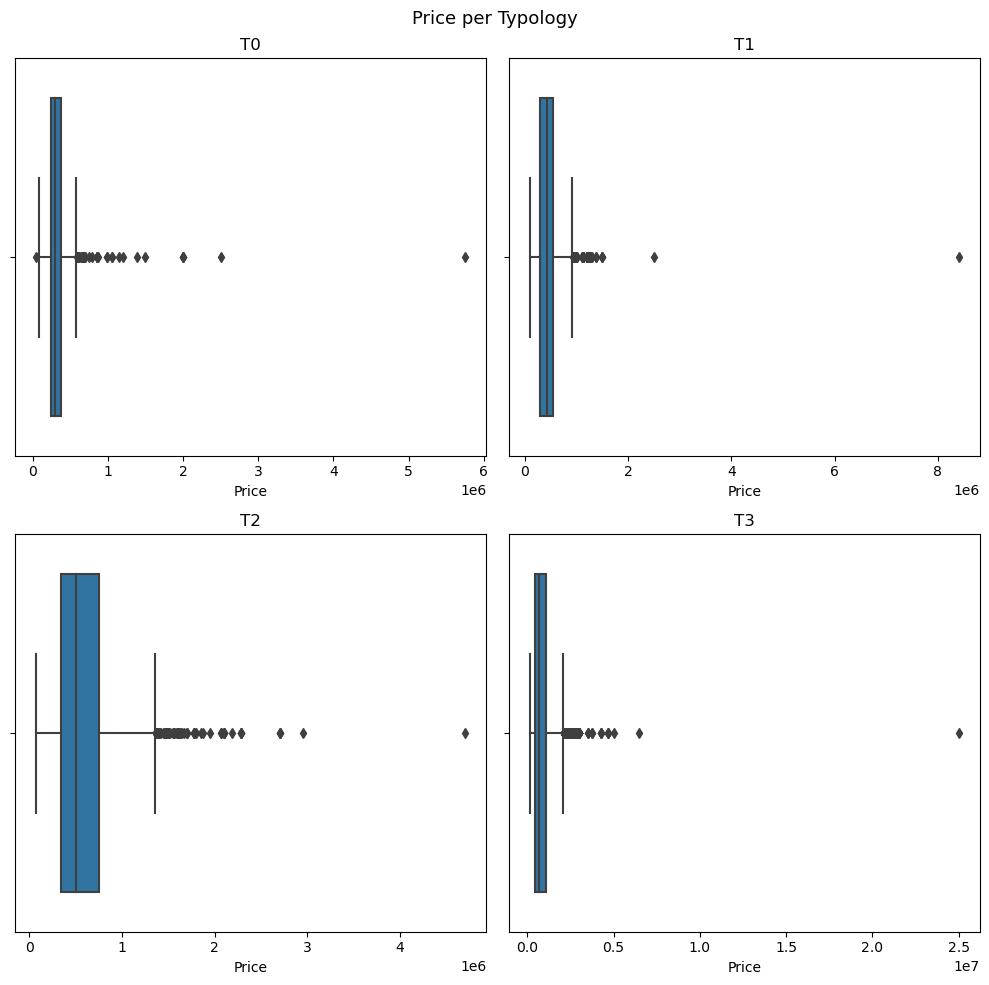

In [131]:
fig, ax = plt.subplots(2, 2, figsize =(10,10))

sns.boxplot(data=final_df[final_df["Typology"] == "T0"], x="Price", ax=ax[0,0])
sns.boxplot(data=final_df[final_df["Typology"] == "T1"], x="Price", ax=ax[0,1])
sns.boxplot(data=final_df[final_df["Typology"] == "T2"], x="Price", ax=ax[1,0])
sns.boxplot(data=final_df[final_df["Typology"] == "T3"], x="Price", ax=ax[1,1])

ax[0,0].set_title("T0")
ax[0,1].set_title("T1")
ax[1,0].set_title("T2")
ax[1,1].set_title("T3")

fig.suptitle("Price per Typology", fontsize=13)

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Price'>

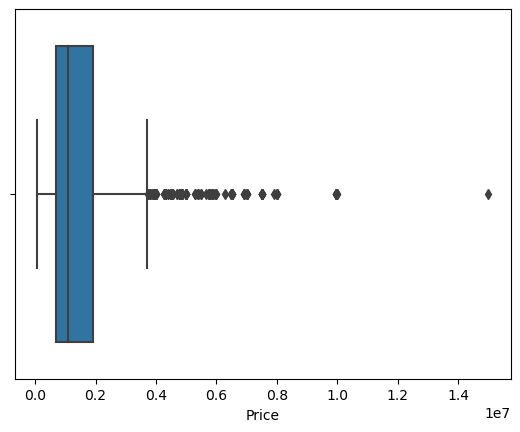

In [132]:
sns.boxplot(data=final_df[final_df["Typology"] == "T4+"], x="Price")

In [133]:
final_df = final_df.drop(final_df[((final_df["Typology"] == "T0") & (final_df["Price"] >= 1250000))].index)
final_df = final_df.drop(final_df[((final_df["Typology"] == "T1") & (final_df["Price"] >= 2000000))].index)
final_df = final_df.drop(final_df[((final_df["Typology"] == "T2") & (final_df["Price"] >= 2500000))].index)
final_df = final_df.drop(final_df[((final_df["Typology"] == "T3") & (final_df["Price"] >= 3000000))].index)
final_df = final_df.drop(final_df[((final_df["Typology"] == "T4+") & (final_df["Price"] >= 8000000))].index)

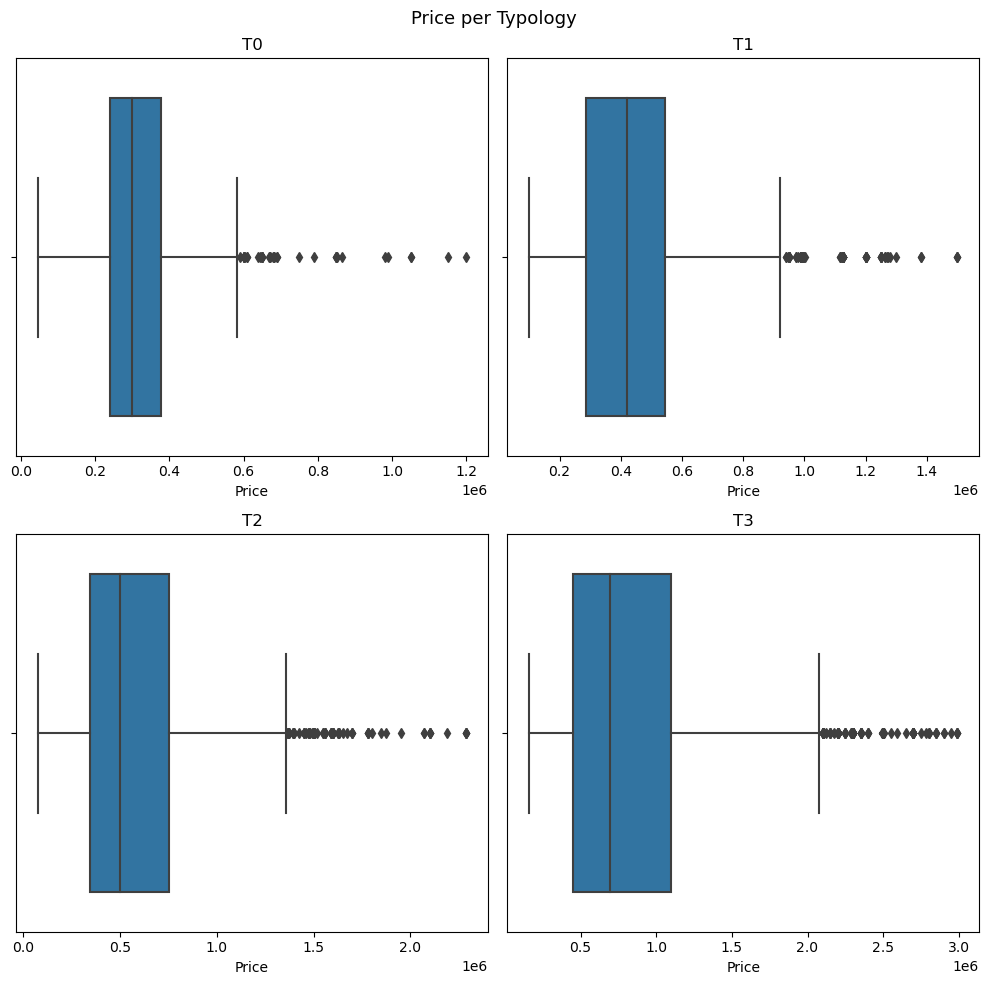

In [134]:
fig, ax = plt.subplots(2, 2, figsize =(10,10))

sns.boxplot(data=final_df[final_df["Typology"] == "T0"], x="Price", ax=ax[0,0])
sns.boxplot(data=final_df[final_df["Typology"] == "T1"], x="Price", ax=ax[0,1])
sns.boxplot(data=final_df[final_df["Typology"] == "T2"], x="Price", ax=ax[1,0])
sns.boxplot(data=final_df[final_df["Typology"] == "T3"], x="Price", ax=ax[1,1])

ax[0,0].set_title("T0")
ax[0,1].set_title("T1")
ax[1,0].set_title("T2")
ax[1,1].set_title("T3")

fig.suptitle("Price per Typology", fontsize=13)

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Price'>

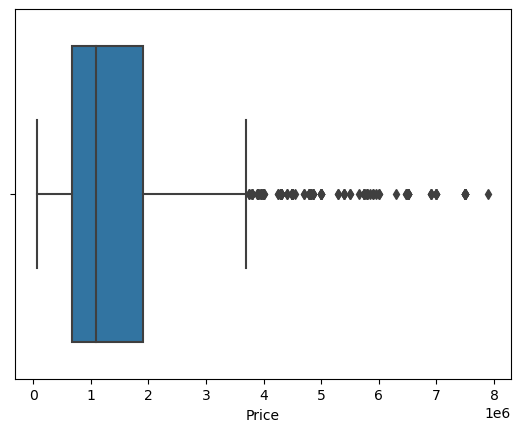

In [135]:
sns.boxplot(data=final_df[final_df["Typology"] == "T4+"], x="Price")

__We decided to maintain some of the outliers, because despite being above the rule of 1.5 * IQR, we think they are not isolated enough for us to remove them__

In [136]:
final_df.describe()

,Price,Gross_Area,Price per Square Meter
count,1.679900e+04,16799.000000,1.679900e+04
mean,7.718634e+05,123.027621,1.110301e+04
std,7.041392e+05,88.751332,1.378683e+05
min,4.500000e+04,1.000000,2.520000e+02
25%,3.690000e+05,67.375000,4.483000e+03
50%,5.500000e+05,99.000000,5.793000e+03
75%,8.900000e+05,150.000000,7.500000e+03
max,7.900000e+06,998.000000,7.425743e+06


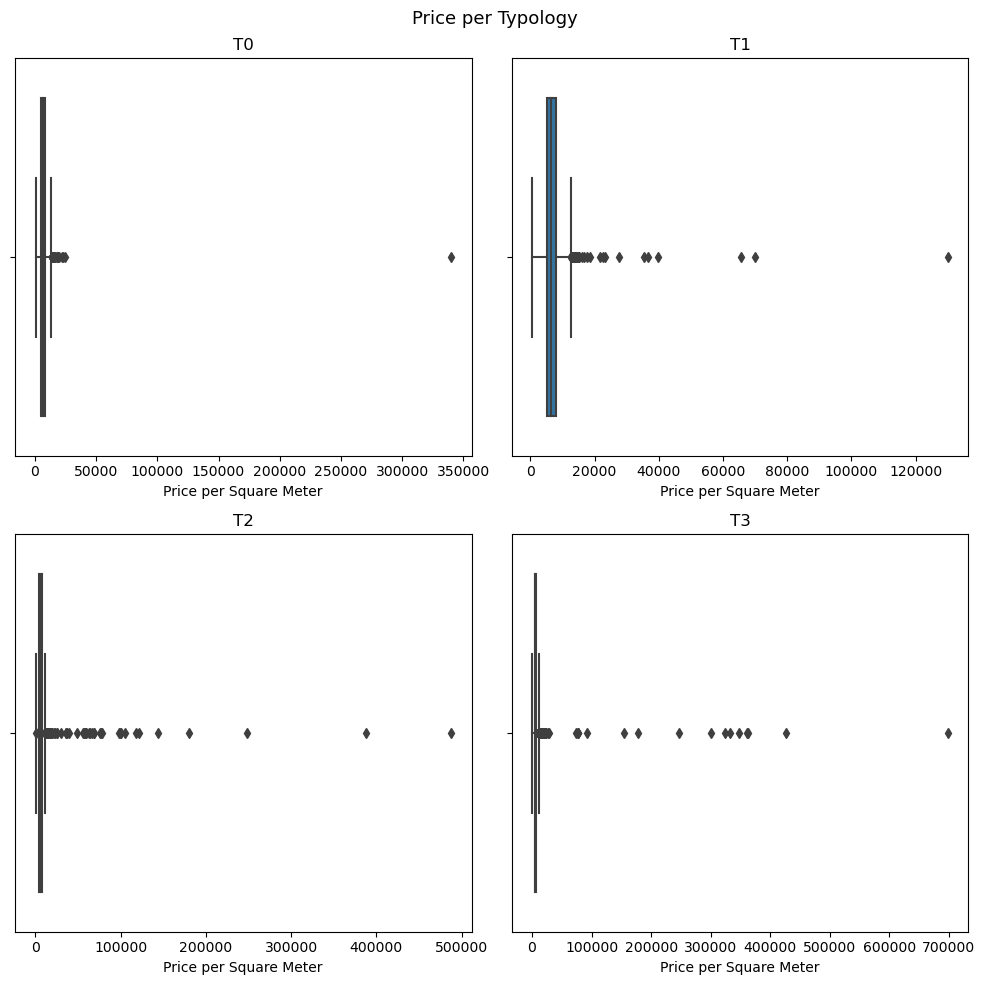

In [137]:
fig, ax = plt.subplots(2, 2, figsize =(10,10))

sns.boxplot(data=final_df[final_df["Typology"] == "T0"], x="Price per Square Meter", ax=ax[0,0])
sns.boxplot(data=final_df[final_df["Typology"] == "T1"], x="Price per Square Meter", ax=ax[0,1])
sns.boxplot(data=final_df[final_df["Typology"] == "T2"], x="Price per Square Meter", ax=ax[1,0])
sns.boxplot(data=final_df[final_df["Typology"] == "T3"], x="Price per Square Meter", ax=ax[1,1])

ax[0,0].set_title("T0")
ax[0,1].set_title("T1")
ax[1,0].set_title("T2")
ax[1,1].set_title("T3")

fig.suptitle("Price per Typology", fontsize=13)

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Price per Square Meter'>

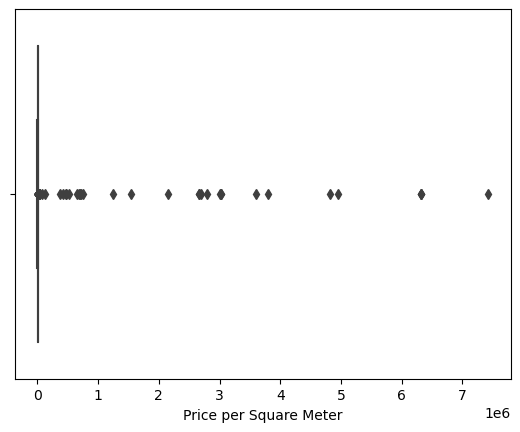

In [138]:
sns.boxplot(data=final_df[final_df["Typology"] == "T4+"], x="Price per Square Meter")

In [139]:
final_df = final_df.drop(final_df[((final_df["Typology"] == "T0") & (final_df["Price per Square Meter"] >= 20000))].index)
final_df = final_df.drop(final_df[((final_df["Typology"] == "T1") & (final_df["Price per Square Meter"] >= 20000))].index)
final_df = final_df.drop(final_df[((final_df["Typology"] == "T2") & (final_df["Price per Square Meter"] >= 20000))].index)
final_df = final_df.drop(final_df[((final_df["Typology"] == "T3") & (final_df["Price per Square Meter"] >= 20000))].index)
final_df = final_df.drop(final_df[((final_df["Typology"] == "T4+") & (final_df["Price per Square Meter"] >= 20000))].index)

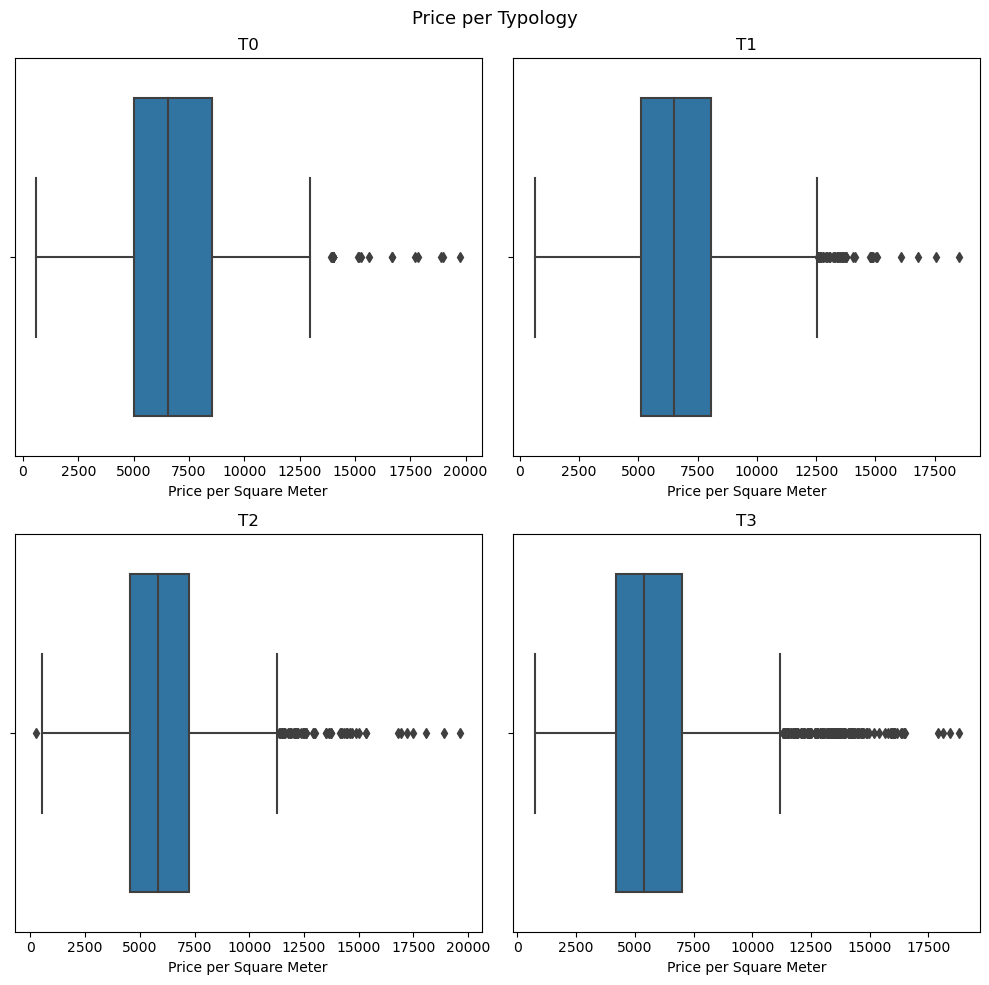

In [140]:
fig, ax = plt.subplots(2, 2, figsize =(10,10))

sns.boxplot(data=final_df[final_df["Typology"] == "T0"], x="Price per Square Meter", ax=ax[0,0])
sns.boxplot(data=final_df[final_df["Typology"] == "T1"], x="Price per Square Meter", ax=ax[0,1])
sns.boxplot(data=final_df[final_df["Typology"] == "T2"], x="Price per Square Meter", ax=ax[1,0])
sns.boxplot(data=final_df[final_df["Typology"] == "T3"], x="Price per Square Meter", ax=ax[1,1])

ax[0,0].set_title("T0")
ax[0,1].set_title("T1")
ax[1,0].set_title("T2")
ax[1,1].set_title("T3")

fig.suptitle("Price per Typology", fontsize=13)

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Price per Square Meter'>

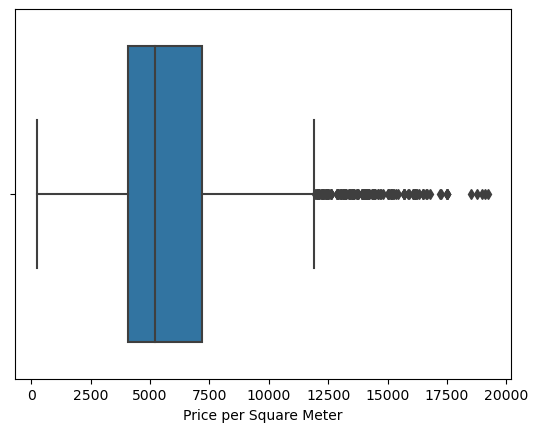

In [141]:
sns.boxplot(data=final_df[final_df["Typology"] == "T4+"], x="Price per Square Meter")

In [142]:
final_df = final_df.drop(final_df[((final_df["Typology"] == "T0") & (final_df["Gross_Area"] >= 1250000))].index)
final_df = final_df.drop(final_df[((final_df["Typology"] == "T1") & (final_df["Price"] >= 2000000))].index)
final_df = final_df.drop(final_df[((final_df["Typology"] == "T2") & (final_df["Price"] >= 2500000))].index)
final_df = final_df.drop(final_df[((final_df["Typology"] == "T3") & (final_df["Price"] >= 3000000))].index)
final_df = final_df.drop(final_df[((final_df["Typology"] == "T4+") & (final_df["Price"] >= 8000000))].index)

In [143]:
final_df

,HouseID,Title,Parish,Price,Gross_Area,Typology,Price per Square Meter,Website
0,32621128.0,Estúdio T0 à venda em Bica - Santa Catarina,Misericórdia,395000.0,61.0,T0,6475.0,Idealista
1,32598993.0,"Estúdio T0 à venda na avenida 24 de Julho, 178",Estrela,265000.0,36.0,T0,7361.0,Idealista
2,32598992.0,"Estúdio T0 à venda na avenida 24 de Julho, 178",Estrela,260000.0,40.0,T0,6500.0,Idealista
3,31580565.0,Estúdio T0 à venda em Principe Real - Praça da...,Santo António,425000.0,36.0,T0,11806.0,Idealista
4,32503498.0,Estúdio T0 à venda na praceta Pátio Salema s/n,Arroios,525000.0,54.0,T0,9722.0,Idealista
...,...,...,...,...,...,...,...,...
16839,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,395000.0,85.0,T4+,4647.0,Supercasa
16840,,"Moradia T5 em São Vicente, Lisboa",São Vicente,650000.0,70.0,T4+,9286.0,Supercasa
16841,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,480000.0,80.0,T4+,6000.0,Supercasa
16842,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,395000.0,96.0,T4+,4115.0,Supercasa


__16685 Final observations__

In [175]:
#final_df.to_csv("final_df.csv", index =False)

In [145]:
final_df.describe()

,Price,Gross_Area,Price per Square Meter
count,1.668500e+04,16685.000000,16685.000000
mean,7.628423e+05,123.703886,6199.641894
std,6.765773e+05,88.614971,2432.737659
min,4.500000e+04,5.000000,252.000000
25%,3.650000e+05,68.000000,4474.000000
50%,5.500000e+05,100.000000,5778.000000
75%,8.850000e+05,150.000000,7473.000000
max,7.900000e+06,998.000000,19767.000000


<div class="alert alert-block alert-warning">

<a id='basic'></a>

# Data Visualization
    
</div>

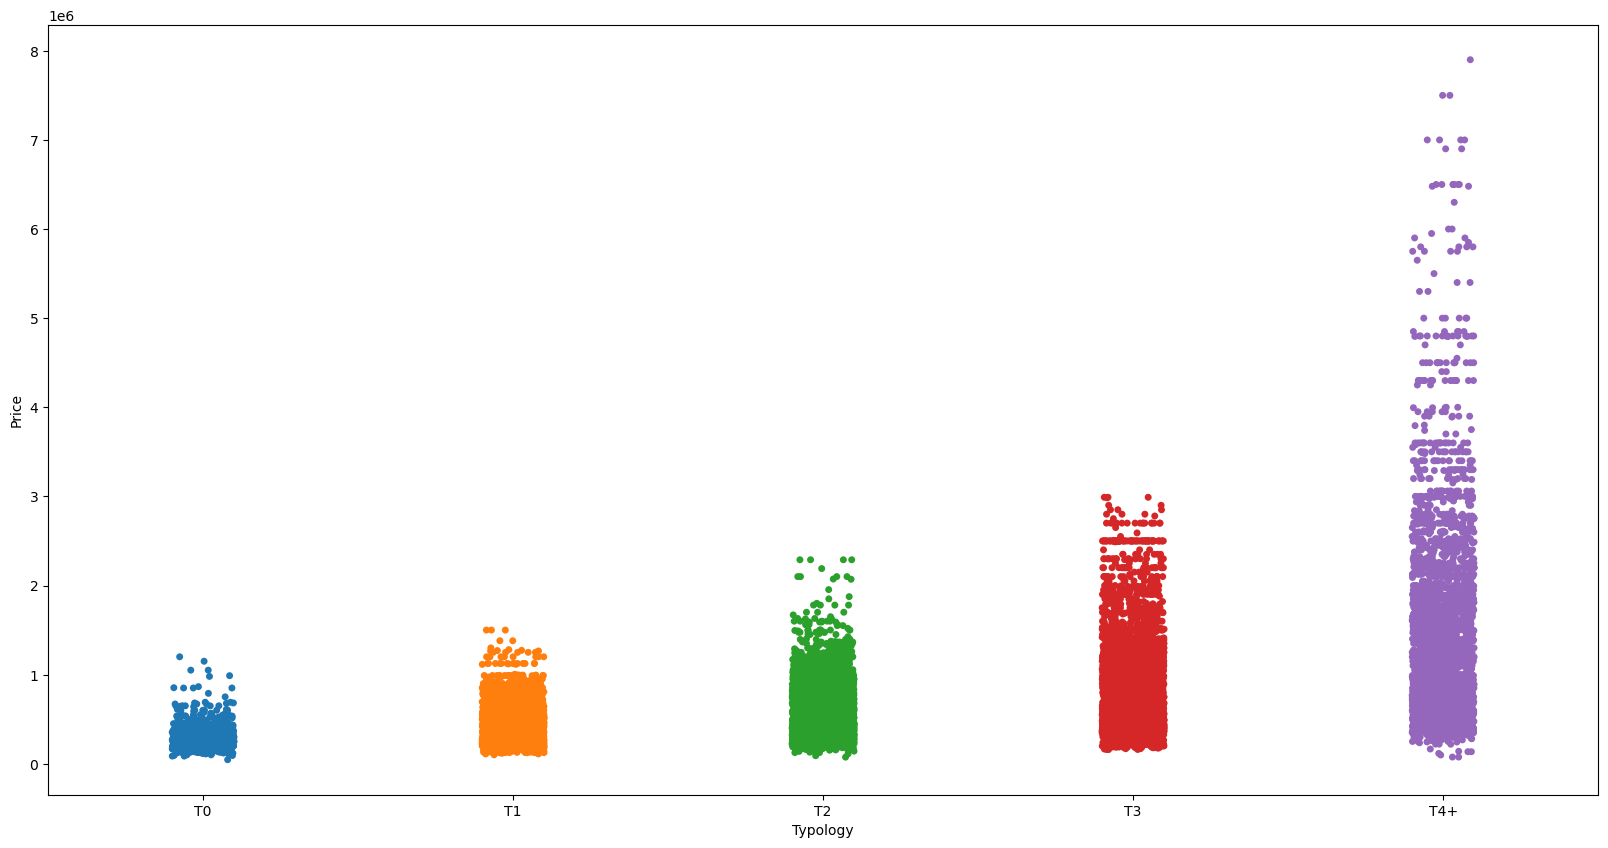

In [146]:
plt.figure(figsize = (20,10))
sns.stripplot(data=final_df, x="Typology", y="Price")
plt.show()

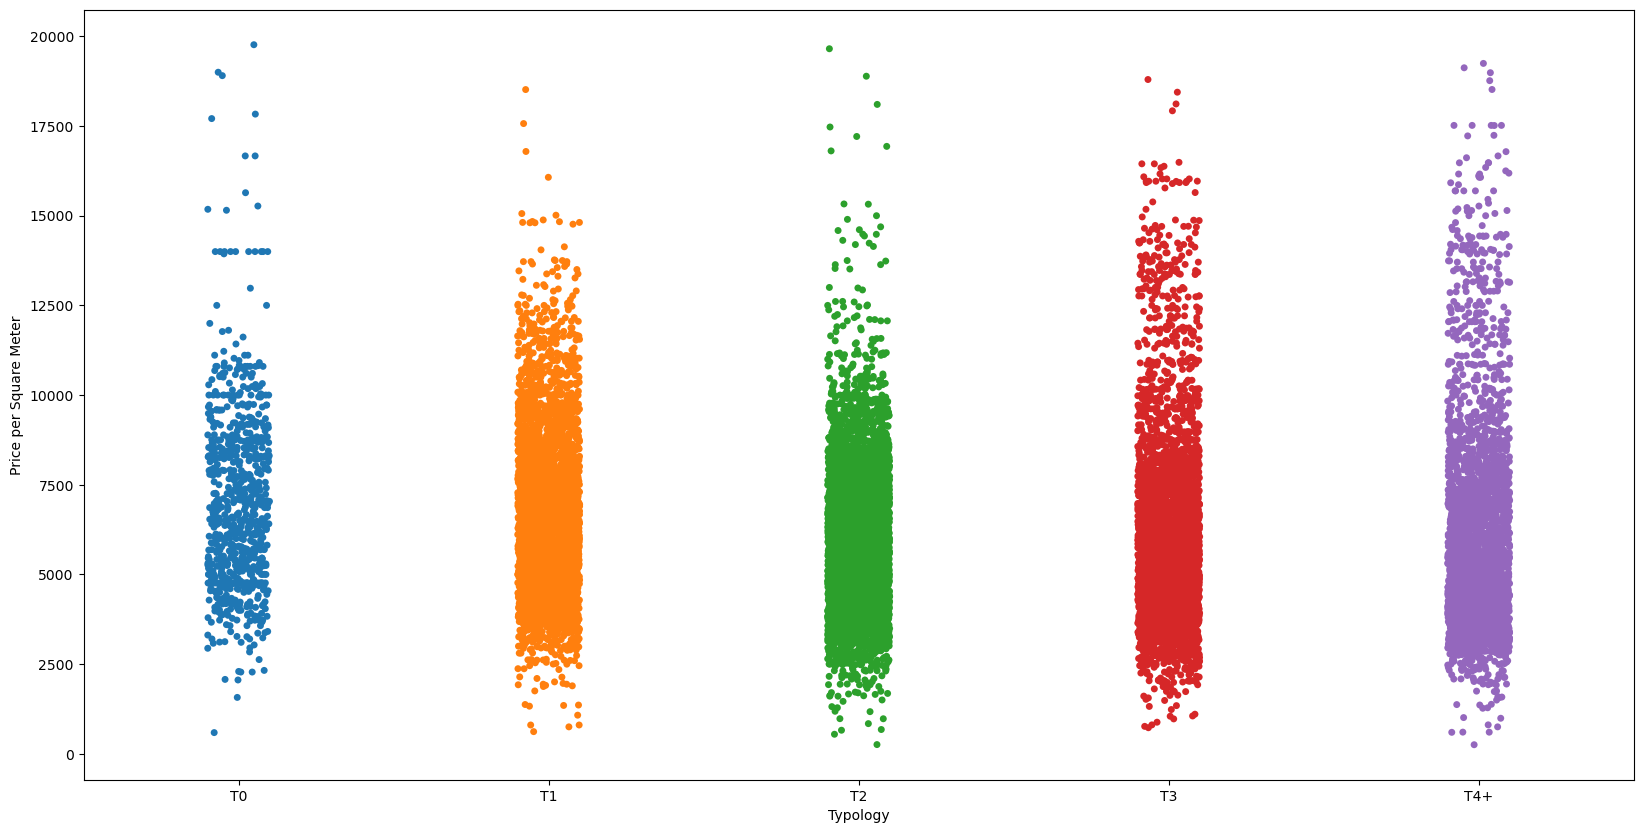

In [147]:
plt.figure(figsize = (20,10))
sns.stripplot(data=final_df, x="Typology", y="Price per Square Meter")
plt.show()

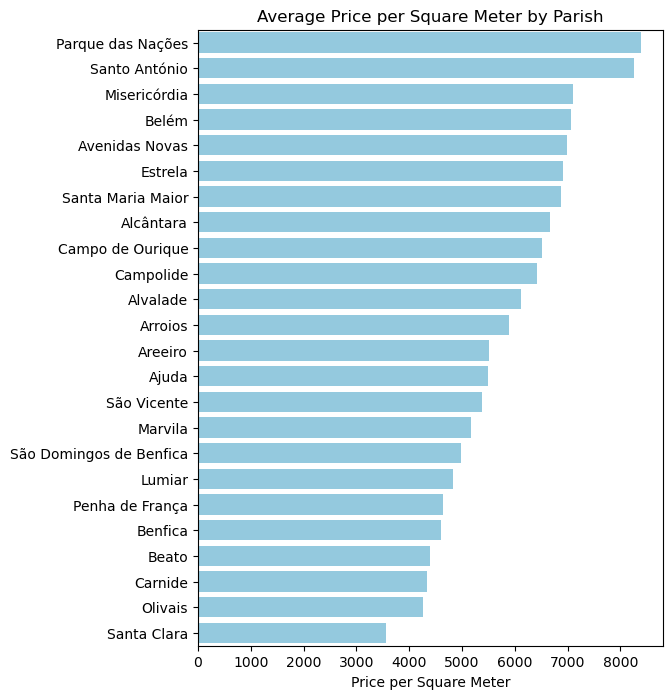

In [148]:
order_price = final_df.groupby(["Parish"])["Price per Square Meter"].mean().sort_values(ascending=False).index

plt.figure(figsize = (6, 8))
sns.barplot(data=final_df, x="Price per Square Meter", y = "Parish", order = order_price, color = "skyblue", ci= None)
plt.title("Average Price per Square Meter by Parish")
plt.ylabel("")
plt.show()

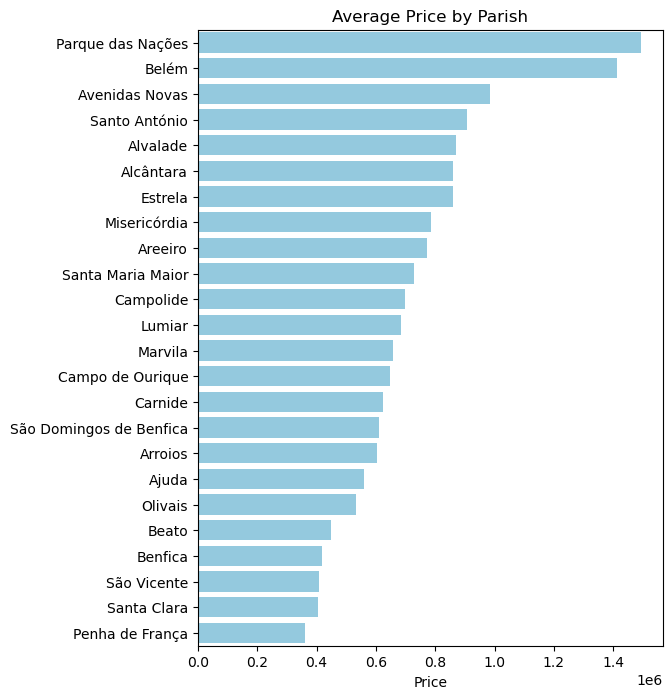

In [149]:
order = final_df.groupby(["Parish"])["Price"].mean().sort_values(ascending=False).index

plt.figure(figsize = (6, 8))
sns.barplot(data=final_df, x="Price", y = "Parish", order = order, color = "skyblue", ci= None)
plt.title("Average Price by Parish")
plt.ylabel("")
plt.show()

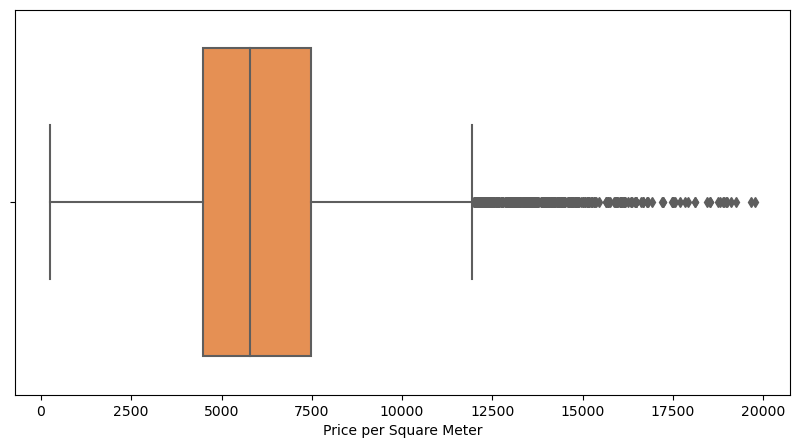

In [150]:
plt.figure(figsize = (10,5))
sns.boxplot(data=final_df, x="Price per Square Meter", palette="Oranges")
plt.ylabel("")
plt.show()

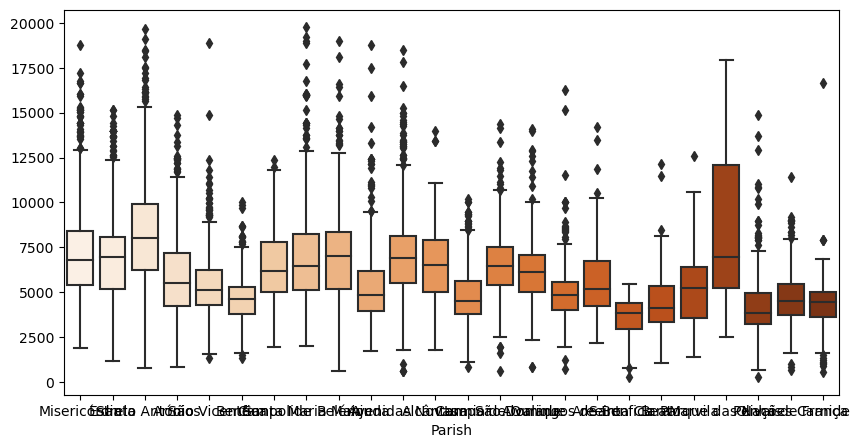

In [151]:
plt.figure(figsize = (10,5))
sns.boxplot(data=final_df, x="Parish", palette="Oranges", y = "Price per Square Meter")
plt.ylabel("")
plt.show()

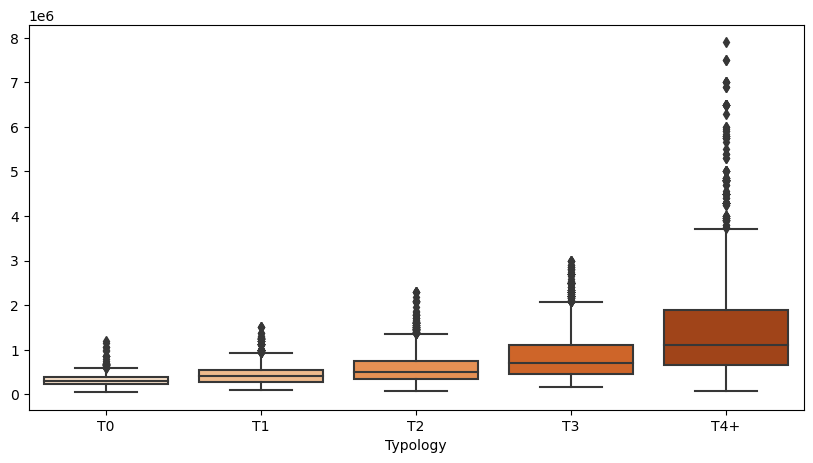

In [152]:
typology = ["T0", "T1", "T2", "T3", "T4+"]

plt.figure(figsize = (10,5))
sns.boxplot(data=final_df, x="Typology", palette="Oranges", y = "Price", order = typology)
plt.ylabel("")
plt.show()

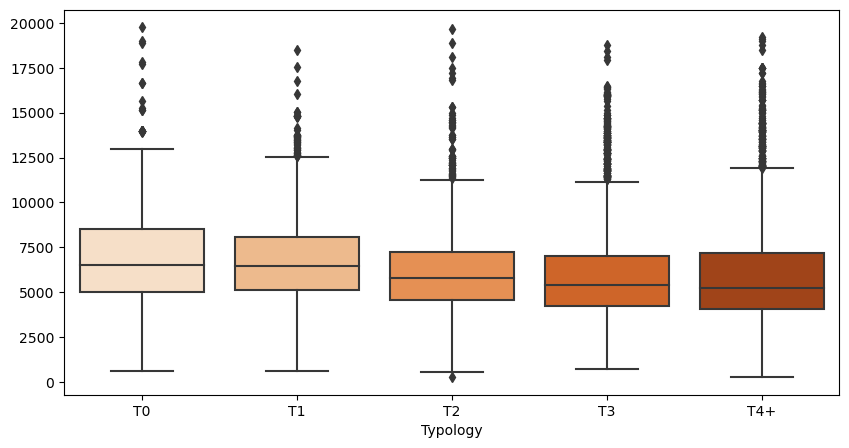

In [153]:
plt.figure(figsize = (10,5))
sns.boxplot(data=final_df, x="Typology", palette="Oranges", y = "Price per Square Meter", order = typology)
plt.ylabel("")
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Count'>

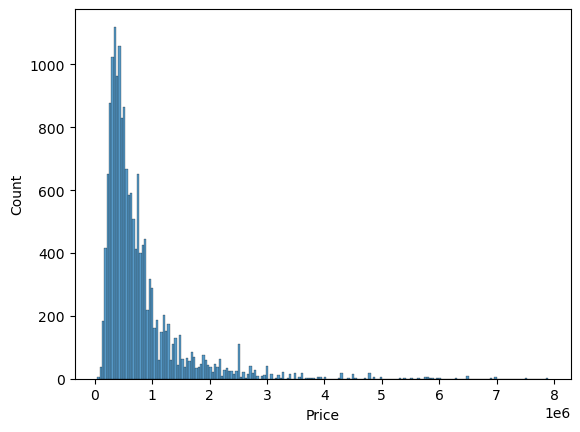

In [154]:
sns.histplot(data = final_df, x = 'Price')

# Map Plot

In [155]:
import geopandas as gpd

Lisbon shapefile taken from https://fenix.tecnico.ulisboa.pt/homepage/ist155593/gis

In [156]:
map_df = gpd.read_file("Lisboa_Freguesias_CAOP2015_TM06.shp")
map_df.head()

,DICOFRE,Freguesia,Concelho,Distrito,AREA_EA_Ha,AREA_T_Ha,Eleitores2,geometry
0,110660,Estrela,LISBOA,LISBOA,460.40,282.53,17455,"POLYGON ((-88810.664 -105313.147, -88799.015 -..."
1,110639,S1o Domingos de Benfica,LISBOA,LISBOA,429.43,429.43,30248,"POLYGON ((-90103.012 -100621.920, -90110.612 -..."
2,110608,Benfica,LISBOA,LISBOA,802.49,802.49,33460,"POLYGON ((-91643.877 -101147.055, -91651.910 -..."
3,110621,Marvila,LISBOA,LISBOA,712.24,626.52,34408,"POLYGON ((-84315.616 -100860.113, -84313.637 -..."
4,110654,Alvalade,LISBOA,LISBOA,534.17,534.17,29941,"POLYGON ((-86521.490 -100029.302, -86523.046 -..."


In [157]:
map_df["Freguesia"].value_counts()

Estrela                    1
S1o Domingos de Benfica    1
Santa Clara                1
Olivais                    1
Lumiar                     1
Areeiro                    1
Avenidas Novas             1
Campolide                  1
Beato                      1
Penha de Fran              1
Arroios                    1
Santo Ant                  1
Alc6ntara                  1
Ajuda                      1
Campo de Ourique           1
S1o Vicente                1
Bel6m                      1
Santa Maria Maior          1
Miseric                    1
Carnide                    1
Alvalade                   1
Marvila                    1
Benfica                    1
Parque das Nas             1
Name: Freguesia, dtype: int64

In [158]:
final_df["Parish"].value_counts()

Avenidas Novas             1431
Arroios                    1228
Santo António              1203
Santa Maria Maior          1004
Misericórdia                979
Estrela                     949
Belém                       887
Lumiar                      882
Benfica                     863
São Vicente                 831
Alvalade                    748
Campolide                   721
Penha de França             676
Campo de Ourique            658
São Domingos de Benfica     559
Areeiro                     557
Parque das Nações           557
Olivais                     404
Marvila                     380
Alcântara                   351
Ajuda                       257
Beato                       198
Santa Clara                 186
Carnide                     176
Name: Parish, dtype: int64

<AxesSubplot:>

<Figure size 1000x500 with 0 Axes>

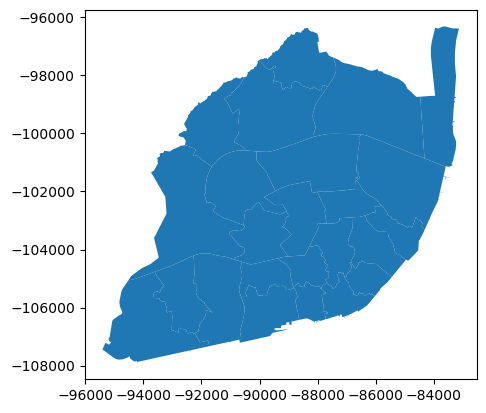

In [159]:
plt.figure(figsize = (10,5))
map_df.plot()

__We corrected the values in "Freguesia" to match the ones in our dataframe__

In [160]:
map_df.replace({"Freguesia":{"S1o Domingos de Benfica": "São Domingos de Benfica"}}, inplace = True)
map_df.replace({"Freguesia":{"Penha de Fran": "Penha de França"}}, inplace = True)
map_df.replace({"Freguesia":{"Santo Ant": "Santo António"}}, inplace = True)
map_df.replace({"Freguesia":{"Alc6ntara": "Alcântara"}}, inplace = True)
map_df.replace({"Freguesia":{"S1o Vicente": "São Vicente"}}, inplace = True)
map_df.replace({"Freguesia":{"Bel6m": "Belém"}}, inplace = True)
map_df.replace({"Freguesia":{"Miseric": "Misericórdia"}}, inplace = True)
map_df.replace({"Freguesia":{"Parque das Nas": "Parque das Nações"}}, inplace = True)

In [161]:
final_df_map = final_df.groupby(["Parish"])["Price per Square Meter"].mean()

In [162]:
merged_df = pd.merge(map_df, final_df_map, left_on='Freguesia', right_on='Parish')

In [163]:
merged_df.head()

,DICOFRE,Freguesia,Concelho,Distrito,AREA_EA_Ha,AREA_T_Ha,Eleitores2,geometry,Price per Square Meter
0,110660,Estrela,LISBOA,LISBOA,460.40,282.53,17455,"POLYGON ((-88810.664 -105313.147, -88799.015 -...",6914.799789
1,110639,São Domingos de Benfica,LISBOA,LISBOA,429.43,429.43,30248,"POLYGON ((-90103.012 -100621.920, -90110.612 -...",4973.402504
2,110608,Benfica,LISBOA,LISBOA,802.49,802.49,33460,"POLYGON ((-91643.877 -101147.055, -91651.910 -...",4600.183082
3,110621,Marvila,LISBOA,LISBOA,712.24,626.52,34408,"POLYGON ((-84315.616 -100860.113, -84313.637 -...",5166.086842
4,110654,Alvalade,LISBOA,LISBOA,534.17,534.17,29941,"POLYGON ((-86521.490 -100029.302, -86523.046 -...",6123.022727


In [164]:
merged_df["coords"] = merged_df["geometry"].apply(lambda x: x.representative_point().coords[:])
merged_df["coords"] = [coords[0] for coords in merged_df["coords"]]

__The coords column was created to be able to include the parish value into the correspondent parish in the map__

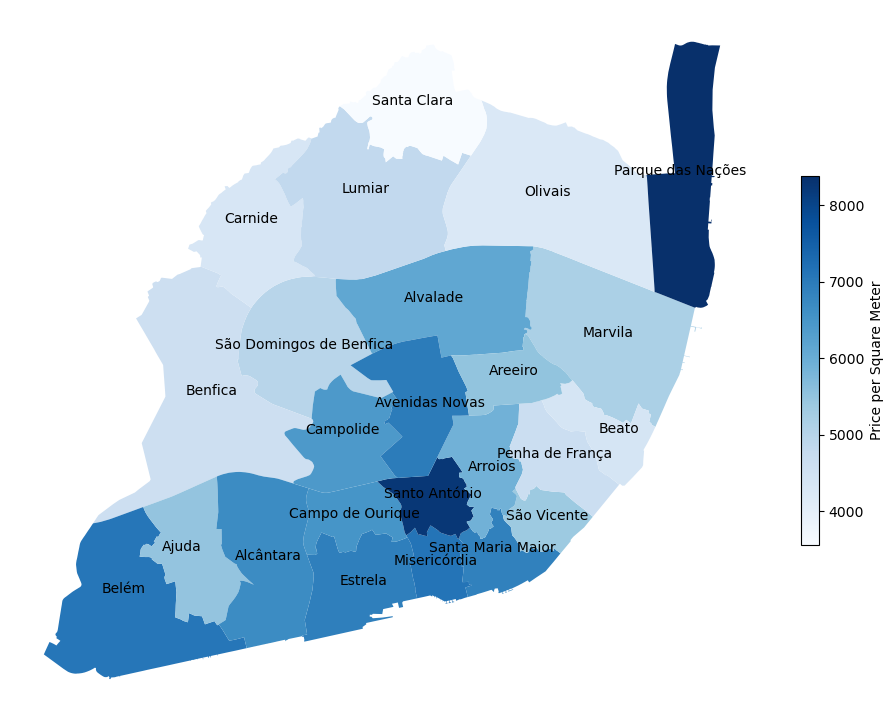

In [165]:
fig, ax = plt.subplots(figsize = (12,12))
ax = merged_df.plot(ax = ax, column="Price per Square Meter", legend = True, cmap='Blues', legend_kwds={"label": "Price per Square Meter", 'shrink': 0.4})
ax.axis("off")

for idx, row in merged_df.iterrows():
   plt.annotate(text=row["Freguesia"], xy=row["coords"], horizontalalignment="center", color="black", fontsize = 10)

plt.show()

In [166]:
final_df_map2 = final_df.groupby(["Parish"])["HouseID"].count()
final_df_map2

Parish
Ajuda                       257
Alcântara                   351
Alvalade                    748
Areeiro                     557
Arroios                    1228
Avenidas Novas             1431
Beato                       198
Belém                       887
Benfica                     863
Campo de Ourique            658
Campolide                   721
Carnide                     176
Estrela                     949
Lumiar                      882
Marvila                     380
Misericórdia                979
Olivais                     404
Parque das Nações           557
Penha de França             676
Santa Clara                 186
Santa Maria Maior          1004
Santo António              1203
São Domingos de Benfica     559
São Vicente                 831
Name: HouseID, dtype: int64

In [167]:
merged_df2 = pd.merge(map_df, final_df_map2, left_on='Freguesia', right_on='Parish')

In [168]:
merged_df2["coords"] = merged_df2["geometry"].apply(lambda x: x.representative_point().coords[:])
merged_df2["coords"] = [coords[0] for coords in merged_df2["coords"]]

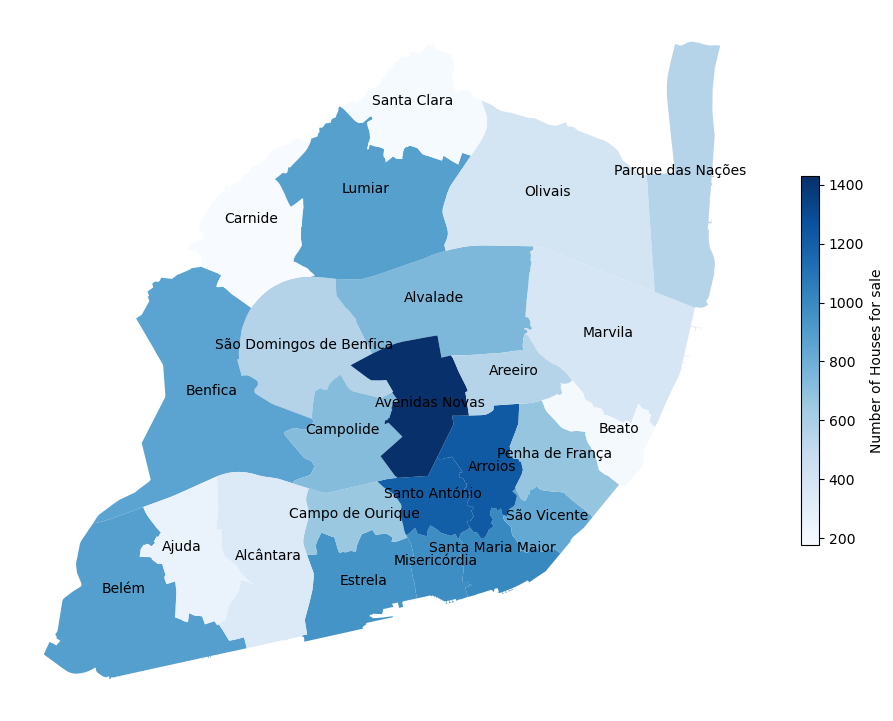

In [169]:
fig, ax = plt.subplots(figsize = (12,12))
ax = merged_df2.plot(ax = ax, column="HouseID", legend = True, cmap='Blues', legend_kwds={"label": "Number of Houses for sale", 'shrink': 0.4})
ax.axis("off")

for idx, row in merged_df2.iterrows():
   plt.annotate(text=row["Freguesia"], xy=row["coords"], horizontalalignment="center", color="black", fontsize = 10)


plt.show()

# WordCloud

In [170]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

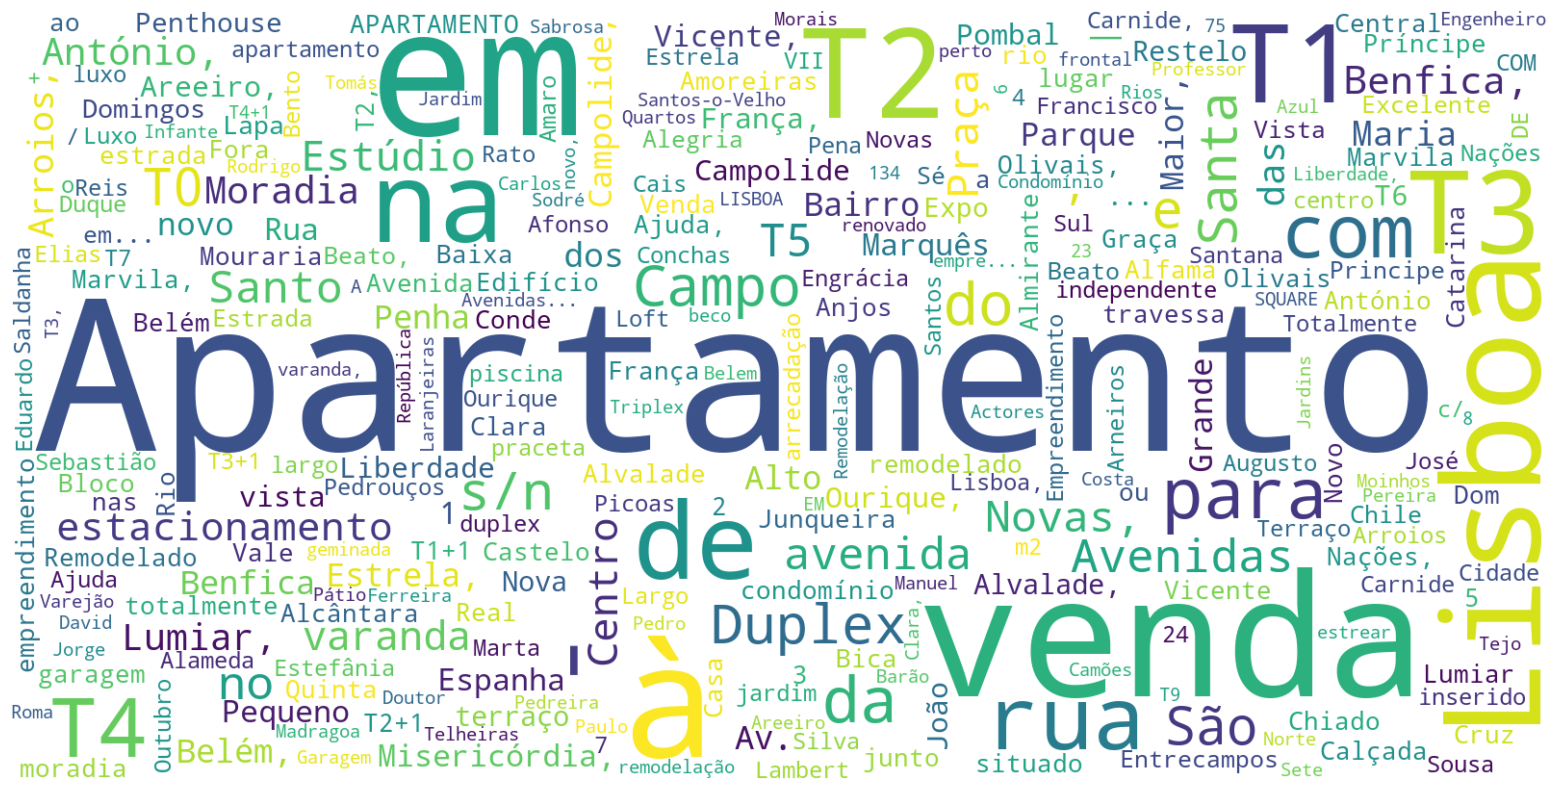

In [171]:
from collections import Counter

# Concatenate all the words in the 'Title' column with space
text = ' '.join(final_df['Title'].astype(str))

# Split the text into individual words
words = text.split()

# Count the frequency of each word
word_counts = Counter(words)

# Create and generate a word cloud image
wordcloud = WordCloud(
    max_words=300,
    background_color="white",
    width=1600,
    height=800,
    random_state=2
).generate_from_frequencies(word_counts)  # Generate the word cloud using word frequencies

# Display the generated image
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("Wordcloud.png", dpi=300)
plt.show()